# chapter 1 data munging

# Segment 1-filtering and selecting data

In [1]:
import numpy as np
import pandas as pd

from pandas import Series,DataFrame

## selecting and retreving data 

In [2]:
series_obj=Series(np.arange(8),index=['row 1','row 2','row 3','row 4','row 5','row 6','row 7','row 8'])
series_obj

row 1    0
row 2    1
row 3    2
row 4    3
row 5    4
row 6    5
row 7    6
row 8    7
dtype: int32

In [4]:
series_obj['row 7']

6

In [5]:
series_obj[[0,7]]

row 1    0
row 8    7
dtype: int32

In [6]:
np.random.seed(25)
DF_obj=DataFrame(np.random.rand(36).reshape((6,6)),index=['row 1','row 2','row 3','row 4','row 5','row 6'],columns=['column 1','column 2','column 3','column 4','column 5','column 6'])
DF_obj

,column 1,column 2,column 3,column 4,column 5,column 6
row 1,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
row 2,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
row 3,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
row 4,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
row 5,0.514244,0.559053,0.034450,0.719930,0.421004,0.436935
row 6,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [7]:
DF_obj.ix[['row 2','row 5'],['column 5','column 2']]

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,column 5,column 2
row 2,0.402366,0.437611
row 5,0.421004,0.559053


## dataslicing

In [8]:
series_obj['row 3':'row 7']

row 3    2
row 4    3
row 5    4
row 6    5
row 7    6
dtype: int32

## comparing with scalars

In [9]:
DF_obj < .2

,column 1,column 2,column 3,column 4,column 5,column 6
row 1,False,False,False,True,False,True
row 2,False,False,False,False,False,True
row 3,False,False,True,False,False,False
row 4,False,False,False,False,False,False
row 5,False,False,True,False,False,False
row 6,False,False,False,False,False,False


## filtering with scalers

In [10]:
series_obj[series_obj > 6]

row 8    7
dtype: int32

## setting values with scalars

In [11]:
series_obj['row 1','row 5','row 8']= 8

In [12]:
series_obj

row 1    8
row 2    1
row 3    2
row 4    3
row 5    8
row 6    5
row 7    6
row 8    8
dtype: int32

# segment 2 - treating missing values

In [13]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [14]:
missing=np.nan
series_obj=Series(['row 1','row 2',missing,'row 4','row 5','row 6',missing,'row 8'])
series_obj

0    row 1
1    row 2
2      NaN
3    row 4
4    row 5
5    row 6
6      NaN
7    row 8
dtype: object

In [15]:
series_obj.isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
dtype: bool

In [16]:
np.random.seed(25)
DF_obj=DataFrame(np.random.rand(36).reshape(6,6))
DF_obj

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
2,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
3,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
4,0.514244,0.559053,0.034450,0.719930,0.421004,0.436935
5,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [17]:
DF_obj.ix[3:5,0]=missing
DF_obj.ix[1:4,5]=missing
DF_obj

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,NaN
2,0.447031,0.585445,0.161985,0.520719,0.326051,NaN
3,NaN,0.836375,0.481343,0.516502,0.383048,NaN
4,NaN,0.559053,0.034450,0.719930,0.421004,NaN
5,NaN,0.900274,0.669612,0.456069,0.289804,0.525819


In [18]:
filled_DF=DF_obj.fillna(0)
filled_DF

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,0.000000
2,0.447031,0.585445,0.161985,0.520719,0.326051,0.000000
3,0.000000,0.836375,0.481343,0.516502,0.383048,0.000000
4,0.000000,0.559053,0.034450,0.719930,0.421004,0.000000
5,0.000000,0.900274,0.669612,0.456069,0.289804,0.525819


In [20]:
filled_DF=DF_obj.fillna({0:0.1,5:1.25})
filled_DF

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,1.250000
2,0.447031,0.585445,0.161985,0.520719,0.326051,1.250000
3,0.100000,0.836375,0.481343,0.516502,0.383048,1.250000
4,0.100000,0.559053,0.034450,0.719930,0.421004,1.250000
5,0.100000,0.900274,0.669612,0.456069,0.289804,0.525819


In [21]:
fill_DF=DF_obj.fillna(method='ffill')
fill_DF

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,0.117376
2,0.447031,0.585445,0.161985,0.520719,0.326051,0.117376
3,0.447031,0.836375,0.481343,0.516502,0.383048,0.117376
4,0.447031,0.559053,0.034450,0.719930,0.421004,0.117376
5,0.447031,0.900274,0.669612,0.456069,0.289804,0.525819


## counting missing values

In [22]:
np.random.seed(25)
DF_obj=DataFrame(np.random.rand(36).reshape(6,6))
DF_obj.ix[3:5,0]=missing
DF_obj.ix[1:4,5]=missing
DF_obj

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,NaN
2,0.447031,0.585445,0.161985,0.520719,0.326051,NaN
3,NaN,0.836375,0.481343,0.516502,0.383048,NaN
4,NaN,0.559053,0.034450,0.719930,0.421004,NaN
5,NaN,0.900274,0.669612,0.456069,0.289804,0.525819


In [23]:
DF_obj.isnull().sum()

0    3
1    0
2    0
3    0
4    0
5    4
dtype: int64

## filtering out missing values

In [56]:
DF_no_NaN=DF_obj.dropna()
#for droping column
#DF_no_NaN=DF_obj.dropna(axis=1)
DF_no_NaN

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.4111,0.117376


In [25]:
DF_obj.dropna(how='all')

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,NaN
2,0.447031,0.585445,0.161985,0.520719,0.326051,NaN
3,NaN,0.836375,0.481343,0.516502,0.383048,NaN
4,NaN,0.559053,0.034450,0.719930,0.421004,NaN
5,NaN,0.900274,0.669612,0.456069,0.289804,0.525819


# segment 3 removing duplicates

In [26]:
import numpy as np
import pandas as pd

from pandas import Series,DataFrame

## removing duplicate

In [27]:
df_obj=DataFrame({'column 1':[1,1,2,2,3,3,3],
                 'column 2':['a','a','b','b','c','c','c'],
                 'column 3':['A','A','B','B','C','C','C']})
df_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,C
6,3,c,C


In [28]:
df_obj.duplicated()

0    False
1     True
2    False
3     True
4    False
5     True
6     True
dtype: bool

In [30]:
df_obj.drop_duplicates()

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C


In [31]:
df_obj=DataFrame({'column 1':[1,1,2,2,3,3,3],
                 'column 2':['a','a','b','b','c','c','c'],
                 'column 3':['A','A','B','B','C','D','C']})
df_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,D
6,3,c,C


In [32]:
df_obj.drop_duplicates(['column 3'])

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C
5,3,c,D


# segment 4 concatning data and tranforming data

In [33]:
import numpy as np 
import pandas as pd 
from pandas import Series,DataFrame

In [35]:
df_obj=pd.DataFrame(np.arange(36).reshape(6,6))
df_obj

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [36]:
df_obj_2=pd.DataFrame(np.arange(15).reshape(5,3))
df_obj_2

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


## Concatenating data

In [38]:
pd.concat([df_obj,df_obj_2],axis=1)

,0,1,2,3,4,5,0,1,2
0,0,1,2,3,4,5,0.0,1.0,2.0
1,6,7,8,9,10,11,3.0,4.0,5.0
2,12,13,14,15,16,17,6.0,7.0,8.0
3,18,19,20,21,22,23,9.0,10.0,11.0
4,24,25,26,27,28,29,12.0,13.0,14.0
5,30,31,32,33,34,35,NaN,NaN,NaN


In [39]:
pd.concat([df_obj,df_obj_2])

,0,1,2,3,4,5
0,0,1,2,3.0,4.0,5.0
1,6,7,8,9.0,10.0,11.0
2,12,13,14,15.0,16.0,17.0
3,18,19,20,21.0,22.0,23.0
4,24,25,26,27.0,28.0,29.0
5,30,31,32,33.0,34.0,35.0
0,0,1,2,NaN,NaN,NaN
1,3,4,5,NaN,NaN,NaN
2,6,7,8,NaN,NaN,NaN
3,9,10,11,NaN,NaN,NaN


## droping data


In [40]:
df_obj.drop([0,2])

,0,1,2,3,4,5
1,6,7,8,9,10,11
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [41]:
df_obj.drop([0,2],axis=1)

,1,3,4,5
0,1,3,4,5
1,7,9,10,11
2,13,15,16,17
3,19,21,22,23
4,25,27,28,29
5,31,33,34,35


## adding data

In [42]:
series_obj=Series(np.arange(6))
series_obj.name="added_variable"
series_obj

0    0
1    1
2    2
3    3
4    4
5    5
Name: added_variable, dtype: int32

In [43]:
variable_added=DataFrame.join(df_obj,series_obj)
variable_added

,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5


In [47]:
added_datatable=variable_added.append(variable_added,ignore_index=False)
added_datatable

,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3


In [48]:
added_datatable=variable_added.append(variable_added,ignore_index=True)
added_datatable

,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5
6,0,1,2,3,4,5,0
7,6,7,8,9,10,11,1
8,12,13,14,15,16,17,2
9,18,19,20,21,22,23,3


## sort data

In [49]:
df_sorted=df_obj.sort_values(by=[5],ascending=[False])
df_sorted

,0,1,2,3,4,5
5,30,31,32,33,34,35
4,24,25,26,27,28,29
3,18,19,20,21,22,23
2,12,13,14,15,16,17
1,6,7,8,9,10,11
0,0,1,2,3,4,5


# segment 5 grouping and data aggregation

In [50]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [51]:
cars=pd.read_csv('mtcars.csv')
cars.columns=['car_name','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.head()

,car_name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [53]:
cars_groups=cars.groupby(cars['cyl'])
cars_groups.mean()

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,19.137273,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


# chapter 2 data visualization basics

! pip install Seaborn

In [58]:
! pip install Seaborn

## segment 1- creating standard plots(line,bar,pie)


In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [4]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

## Creating a line chart from a list object

### plotting a line chart in matplotlib

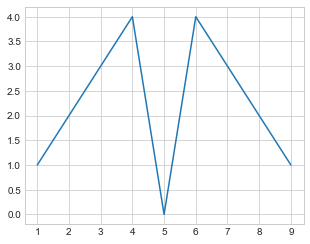

In [5]:
x=range(1,10)
y=[1,2,3,4,0,4,3,2,1]
plt.plot(x,y)

## plotting a line chart from pandas object

In [7]:
cars=pd.read_csv('mtcars.csv')
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
mpg=cars['mpg']

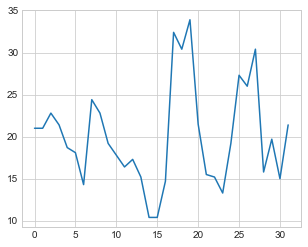

In [8]:
mpg.plot()

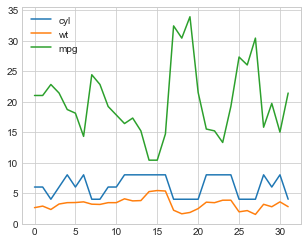

In [9]:
df=cars[['cyl','wt','mpg']]
df.plot()

# Creating bar chart
## creating a bar chart from a list

<BarContainer object of 9 artists>

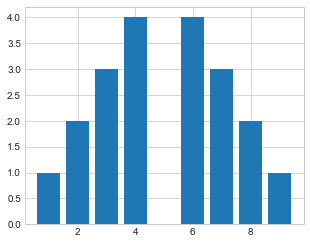

In [10]:
plt.bar(x,y)

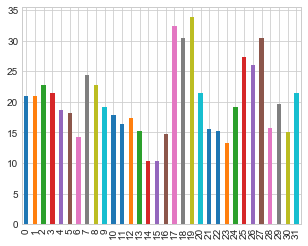

In [11]:
# creating bar chart from pandas lab
mpg.plot(kind='bar')

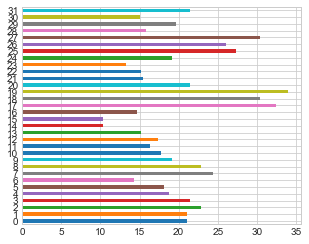

In [12]:
mpg.plot(kind='barh')

# creating pie chart

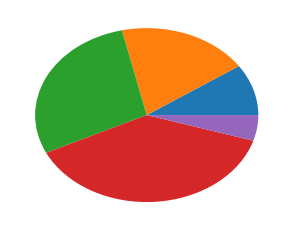

In [13]:
x=[1,2,3,4,0.5]
plt.pie(x)
plt.show()


## saving a plot

In [18]:
plt.savefig('pie_chart.jpeg')
plt.show()

<Figure size 360x288 with 0 Axes>

In [19]:
%pwd

'C:\\Users\\DELL'

# segment 2 defining elements of a plot

In [20]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [22]:
%matplotlib inline
rcParams['figure.figsize']=5,4

## Defining axes, ticks and grids

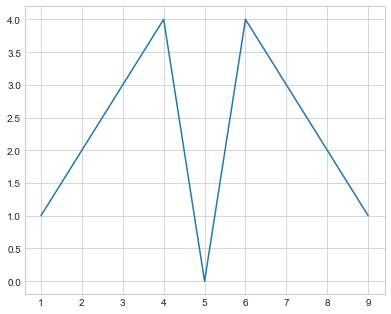

In [23]:
x=range(1,10)
y=[1,2,3,4,0,4,3,2,1]

fig=plt.figure()
ax=fig.add_axes([.1,.1,1,1])
ax.plot(x,y)

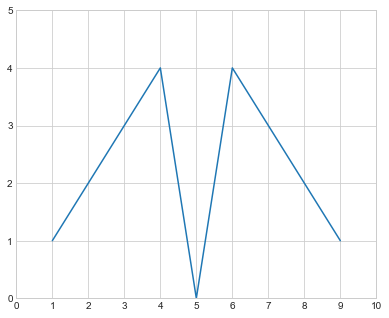

In [24]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,1,1])

ax.set_xlim(1,9)
ax.set_ylim([0,5])

ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
ax.set_yticks([0,1,2,3,4,5])
ax.plot(x,y)

## generating multiple plots in one figure with subplots

<Figure size 360x288 with 0 Axes>

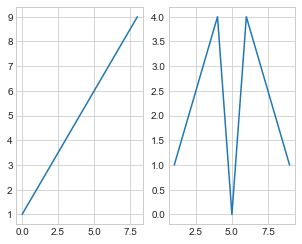

In [25]:
fig=plt.figure()
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.plot(x)
ax2.plot(x,y)

# segment 3 plot formation

In [26]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [28]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

## defining plot color

<BarContainer object of 9 artists>

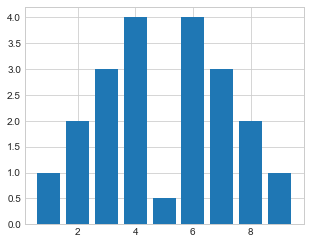

In [29]:
x=range(1,10)
y=[1,2,3,4,0.5,4,3,2,1]
plt.bar(x,y)

<BarContainer object of 9 artists>

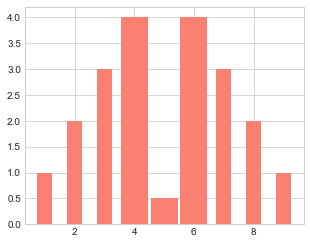

In [30]:
wide=[0.5,0.5,0.5,0.9,0.9,0.9,0.5,0.5,0.5]
color=['salmon']
plt.bar(x,y,width=wide,color=color,align='center')

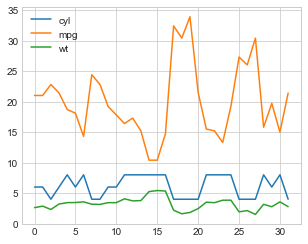

In [31]:
cars=pd.read_csv('mtcars.csv')
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
df=cars[['cyl','mpg','wt']]
df.plot()

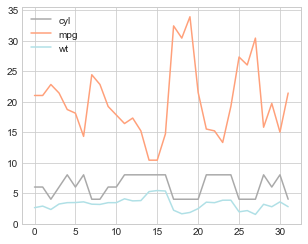

In [32]:
color_theme=['darkgray','lightsalmon','powderblue']
df.plot(color=color_theme)

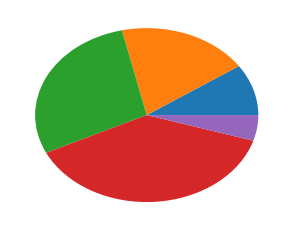

In [33]:
z=[1,2,3,4,0.5]
plt.pie(z)
plt.show()

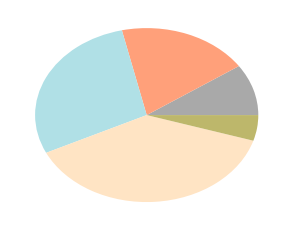

In [36]:
color_theme=['#A9A9A9','#FFA07A','#B0E0E6','#FFE4C4','#BDB76B']
plt.pie(z,colors=color_theme)
plt.show()

# customizing line styles

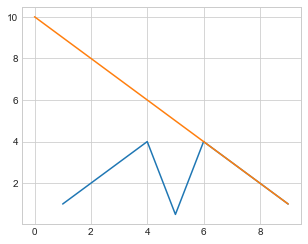

In [37]:
x1=range(0,10)
y1=[10,9,8,7,6,5,4,3,2,1]
plt.plot(x,y)
plt.plot(x1,y1)

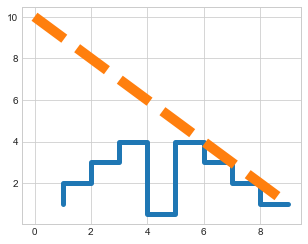

In [45]:
plt.plot(x,y,ls='steps',lw=5)
plt.plot(x1,y1,ls='--',lw=10)

## setting plot markers

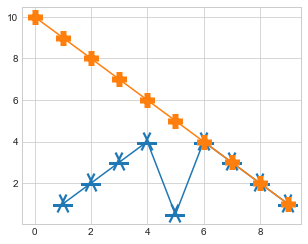

In [46]:
plt.plot(x,y,marker='1',mew=20)
plt.plot(x1,y1,marker='+',mew=15)

# segment 4 - Creating labels and annotations

In [47]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [48]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

## labeling plot features
### the functional method

Text(0,0.5,'your y-axis lable')

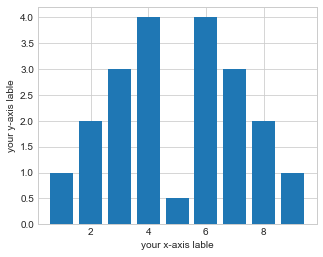

In [51]:
x=range(1,10)
y=[1,2,3,4,0.5,4,3,2,1]
plt.bar(x,y)
plt.xlabel('your x-axis lable')
plt.ylabel('your y-axis lable')

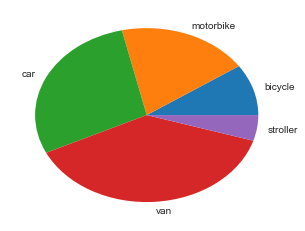

In [52]:
z=[1,2,3,4,.5]
veh_type=['bicycle','motorbike','car','van','stroller']
plt.pie(z,labels=veh_type)
plt.show()

Text(0,0.5,'miles/galen')

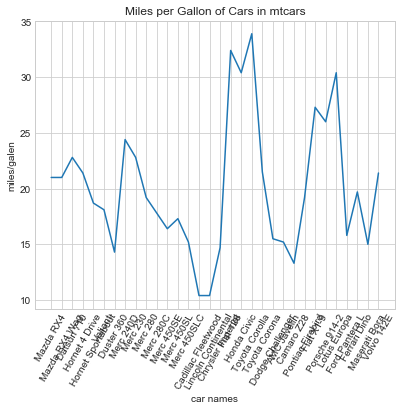

In [55]:
cars=pd.read_csv('mtcars.csv')
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
mpg=cars.mpg
fig=plt.figure()
ax=fig.add_axes([.1,.1,1,1])
mpg.plot()
ax.set_xticks(range(32))
ax.set_xticklabels(cars.car_names,rotation=60,fontsize='medium')
ax.set_title('Miles per Gallon of Cars in mtcars')
ax.set_xlabel('car names')
ax.set_ylabel('miles/galen')

## Adding a legend to your plot
### the functional

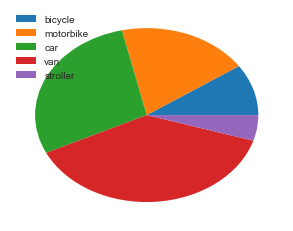

In [56]:
plt.pie(z)
plt.legend(veh_type,loc='best')
plt.show()

## object oriented method

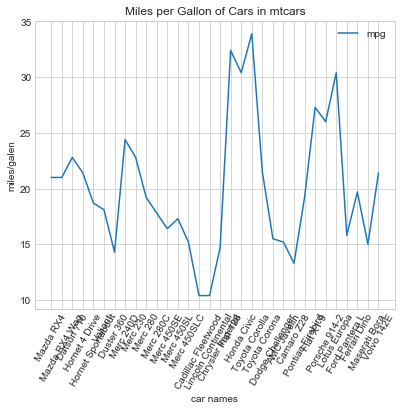

In [58]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,1,1])
mpg.plot()
ax.set_xticks(range(32))
ax.set_xticklabels(cars.car_names,rotation=60,fontsize='medium')
ax.set_title('Miles per Gallon of Cars in mtcars')
ax.set_xlabel('car names')
ax.set_ylabel('miles/galen')

ax.legend(loc='best')

## Annotatinf your plot

In [59]:
mpg.max()

33.9

In [64]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,1,1])
mpg.plot()
ax.set_title('Miles per Gallon of Cars in mtcars')

ax.set_ylabel('miles/galen')
ax.set_ylim([0,45])
ax.annotate('Toyoto Corolla',xy=(19,33.9),xy=(21,35),arrowprops=dict(facecolor='black',shrink=0.05))


SyntaxError: keyword argument repeated (<ipython-input-64-7718287cf832>, line 8)

# segment 5 - Creating visualizations from time series data

In [68]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [69]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

## the simplest time series plot

In [72]:
df=pd.read_csv('Superstore-Sales.csv',index_col='Order Date')
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 16: invalid start byte

## segment 6- construction of histograms, box plots, and scatter plots

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb


In [5]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

## Eyeballing dataset distributionn with histogram

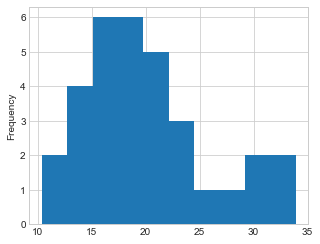

In [8]:
cars=pd.read_csv('mtcars.csv')
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.index=cars.car_names
mpg=cars['mpg']
mpg.plot(kind='hist')

[]

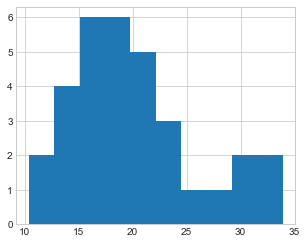

In [10]:
plt.hist(mpg)
plt.plot()

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


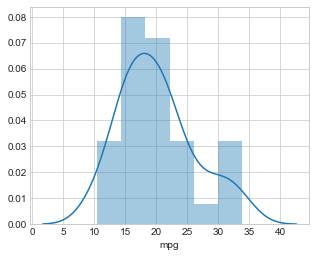

In [11]:
sb.distplot(mpg)


## seeing scatterplots in action

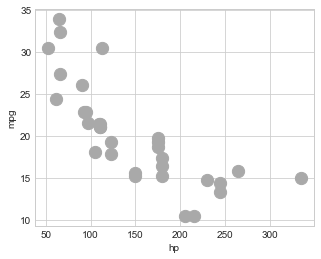

In [12]:
cars.plot(kind='scatter',x='hp',y='mpg',c=['darkgray'],s=150)

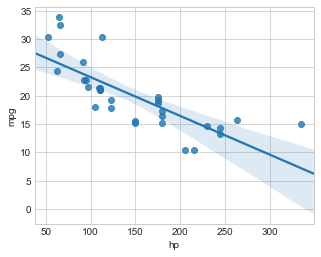

In [14]:
sb.regplot(x='hp',y='mpg',data=cars,scatter=True)

## generating a scatter plot matrix

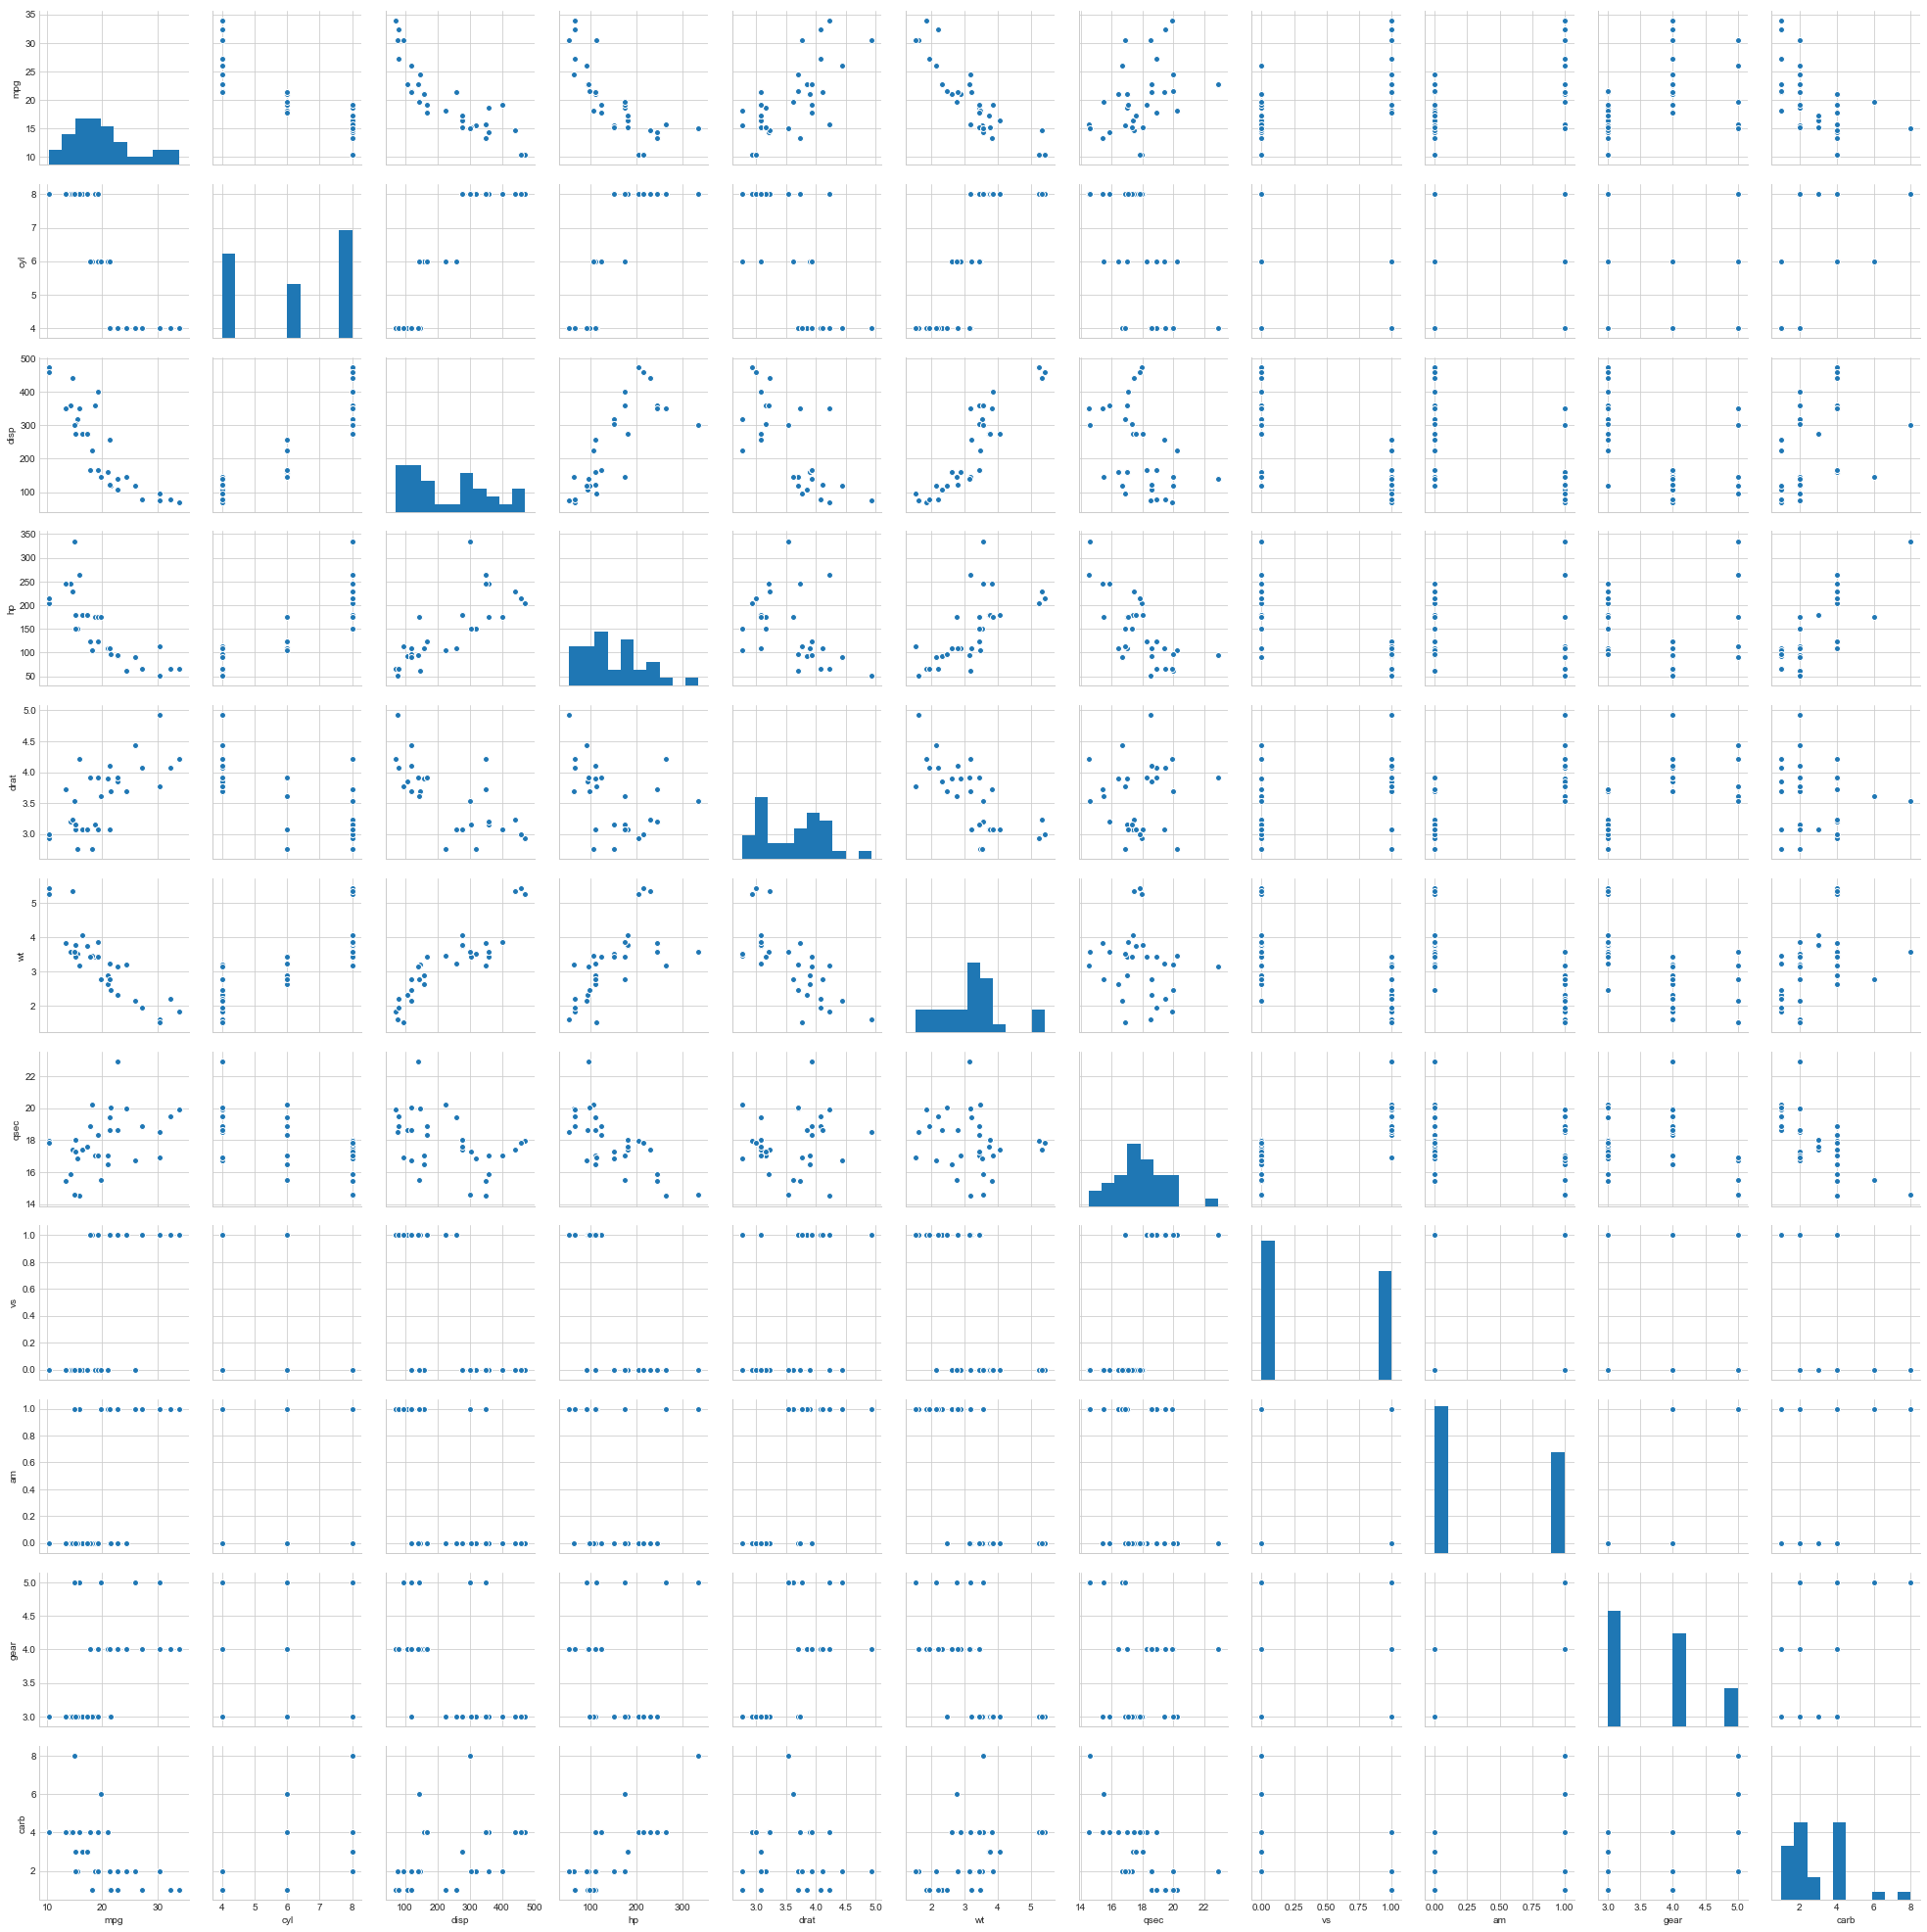

In [15]:
sb.pairplot(cars)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


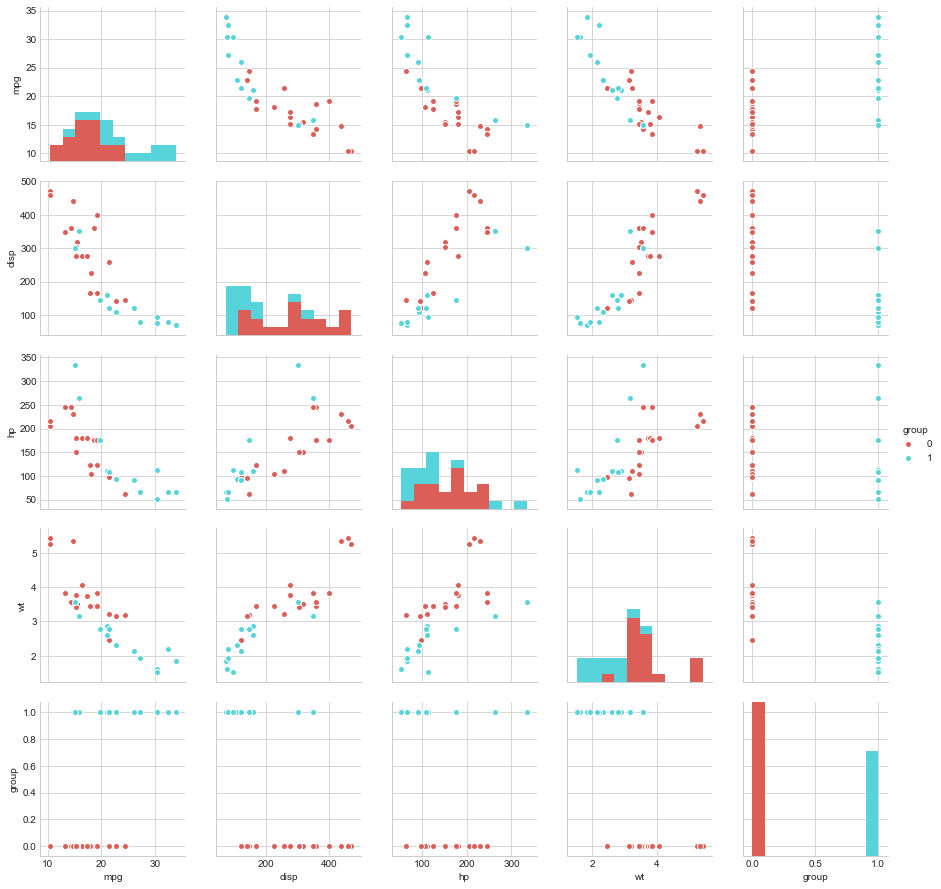

In [19]:
cars_df=pd.DataFrame((cars.ix[:,(1,3,4,6)].values),columns=['mpg','disp','hp','wt'])
cars_target=cars.ix[:,9].values
target_name=[0,1]
cars_df['group']=pd.Series(cars_target,dtype='category')
sb.pairplot(cars_df,hue='group',palette='hls')

## building box plot

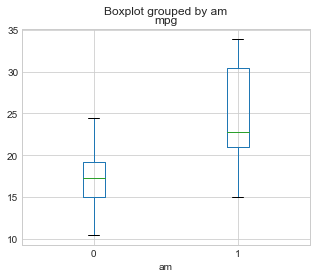

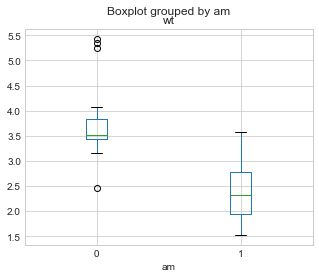

In [20]:
cars.boxplot(column='mpg',by='am')
cars.boxplot(column='wt',by='am')

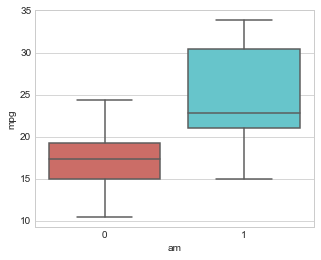

In [21]:
sb.boxplot(x='am',y='mpg',data=cars,palette='hls')

# chapter 3- basic math and statistics

## segment 1- using numpy to perform arithmetic operations on data

In [23]:
import numpy as np
from numpy.random import randn
import pandas as pd

In [25]:
np.set_printoptions(precision=2)

In [26]:
a=np.array([1,2,3,4,5,6])
a

array([1, 2, 3, 4, 5, 6])

In [27]:
b=np.array([[10,20,30],[40,50,60]])
b

array([[10, 20, 30],
       [40, 50, 60]])

In [28]:
np.random.seed(25)
c=36*np.random.randn(6)
c

array([  8.22,  36.97, -30.23, -21.28, -34.45,  -8.  ])

In [30]:
d=np.arange(1,35)
d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

## performing arithmetic on array

In [31]:
a*10

array([10, 20, 30, 40, 50, 60])

In [32]:
c+a

array([  9.22,  38.97, -27.23, -17.28, -29.45,  -2.  ])

In [33]:
c-a

array([  7.22,  34.97, -33.23, -25.28, -39.45, -14.  ])

In [34]:
c*a

array([   8.22,   73.94,  -90.68,  -85.13, -172.24,  -48.02])

In [35]:
c/a

array([  8.22,  18.48, -10.08,  -5.32,  -6.89,  -1.33])

## multiplying matrices and basic linear algebra

In [36]:
aa=np.array([[2,4,6],[1,3,5],[6,7,8]])
aa

array([[2, 4, 6],
       [1, 3, 5],
       [6, 7, 8]])

In [37]:
bb=np.array([[0,1,2],[3,4,5],[6,7,8]])
bb

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [38]:
aa*bb

array([[ 0,  4, 12],
       [ 3, 12, 25],
       [36, 49, 64]])

In [39]:
np.dot(aa,bb)

array([[ 48,  60,  72],
       [ 39,  48,  57],
       [ 69,  90, 111]])

## segment-2 Generating summary statistics using pandas and scipy

In [41]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import scipy
from scipy import stats

In [42]:
cars=pd.read_csv('mtcars.csv')
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## looking at summary statistics that describe a variable's numeric vslues

In [43]:
cars.sum()
#adding element column wise

car_names    Mazda RX4Mazda RX4 WagDatsun 710Hornet 4 Drive...
mpg                                                      642.9
cyl                                                        198
disp                                                    7383.1
hp                                                        4694
drat                                                    115.09
wt                                                     102.952
qsec                                                    571.16
vs                                                          14
am                                                          13
gear                                                       118
carb                                                        90
dtype: object

In [45]:
cars.sum(axis=1)
#adding elements row wise

0     328.980
1     329.795
2     259.580
3     426.135
4     590.310
5     385.540
6     656.920
7     270.980
8     299.570
9     350.460
10    349.660
11    510.740
12    511.500
13    509.850
14    728.560
15    726.644
16    725.695
17    213.850
18    195.165
19    206.955
20    273.775
21    519.650
22    506.085
23    646.280
24    631.175
25    208.215
26    272.570
27    273.683
28    670.690
29    379.590
30    694.710
31    288.890
dtype: float64

In [47]:
cars.median()
#find median of elements in column wise

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

In [48]:
cars.mean()

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [49]:
cars.max()

car_names    Volvo 142E
mpg                33.9
cyl                   8
disp                472
hp                  335
drat               4.93
wt                5.424
qsec               22.9
vs                    1
am                    1
gear                  5
carb                  8
dtype: object

In [50]:
mpg=cars.mpg
mpg.idxmax()

19

## looking at summery statistics that describe variable distribution

In [51]:
cars.std()

mpg       6.026948
cyl       1.785922
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsec      1.786943
vs        0.504016
am        0.498991
gear      0.737804
carb      1.615200
dtype: float64

In [52]:
cars.var()

mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64

In [53]:
gear=cars.gear
gear.value_counts()

3    15
4    12
5     5
Name: gear, dtype: int64

In [54]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


## Segment 3-Summarizing categorical data using pandas

In [55]:
import numpy as np
import pandas as pd


In [57]:
cars=pd.read_csv('mtcars.csv')
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.index=cars.car_names
cars.head(15)

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
car_names,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [59]:
carb=cars.carb
carb.value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [61]:
cars_cat=cars[['cyl','vs','am','gear','carb']]
cars_cat.head()

,cyl,vs,am,gear,carb
car_names,,,,,
Mazda RX4,6,0,1,4,4
Mazda RX4 Wag,6,0,1,4,4
Datsun 710,4,1,1,4,1
Hornet 4 Drive,6,1,0,3,1
Hornet Sportabout,8,0,0,3,2


In [64]:
gears_group=cars_cat.groupby('gear')
gears_group.describe()

am                                               carb           ...   \
     count      mean       std  min  25%  50%  75%  max count      mean ...    
gear                                                                    ...    
3     15.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  15.0  2.666667 ...    
4     12.0  0.666667  0.492366  0.0  0.0  1.0  1.0  1.0  12.0  2.333333 ...    
5      5.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   5.0  4.400000 ...    

      cyl         vs                                               
      75%  max count      mean       std  min  25%  50%  75%  max  
gear                                                               
3     8.0  8.0  15.0  0.200000  0.414039  0.0  0.0  0.0  0.0  1.0  
4     6.0  6.0  12.0  0.833333  0.389249  0.0  1.0  1.0  1.0  1.0  
5     8.0  8.0   5.0  0.200000  0.447214  0.0  0.0  0.0  0.0  1.0  

[3 rows x 32 columns]

## transforming variables to categorical data type

In [65]:
cars['group']=pd.Series(cars.gear,dtype='category')

In [66]:
cars['group'].dtype

CategoricalDtype(categories=[3, 4, 5], ordered=False)

In [67]:
cars['group'].value_counts()

3    15
4    12
5     5
Name: group, dtype: int64

## describe categorical data with crosstab

In [68]:
pd.crosstab(cars['am'],cars['gear'])

gear,3,4,5
am,,,
0,15,4,0
1,0,8,5


# Segment 4- Starting with parametric method in pandas and scipy

In [69]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats.stats import pearsonr

In [70]:
%matplotlib inline
rcParams['figure.figsize']=8,4
plt.style.use('seaborn-whitegrid')

In [86]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats.stats import pearsonr

In [87]:
cars=pd.read_csv('mtcars.csv')
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']


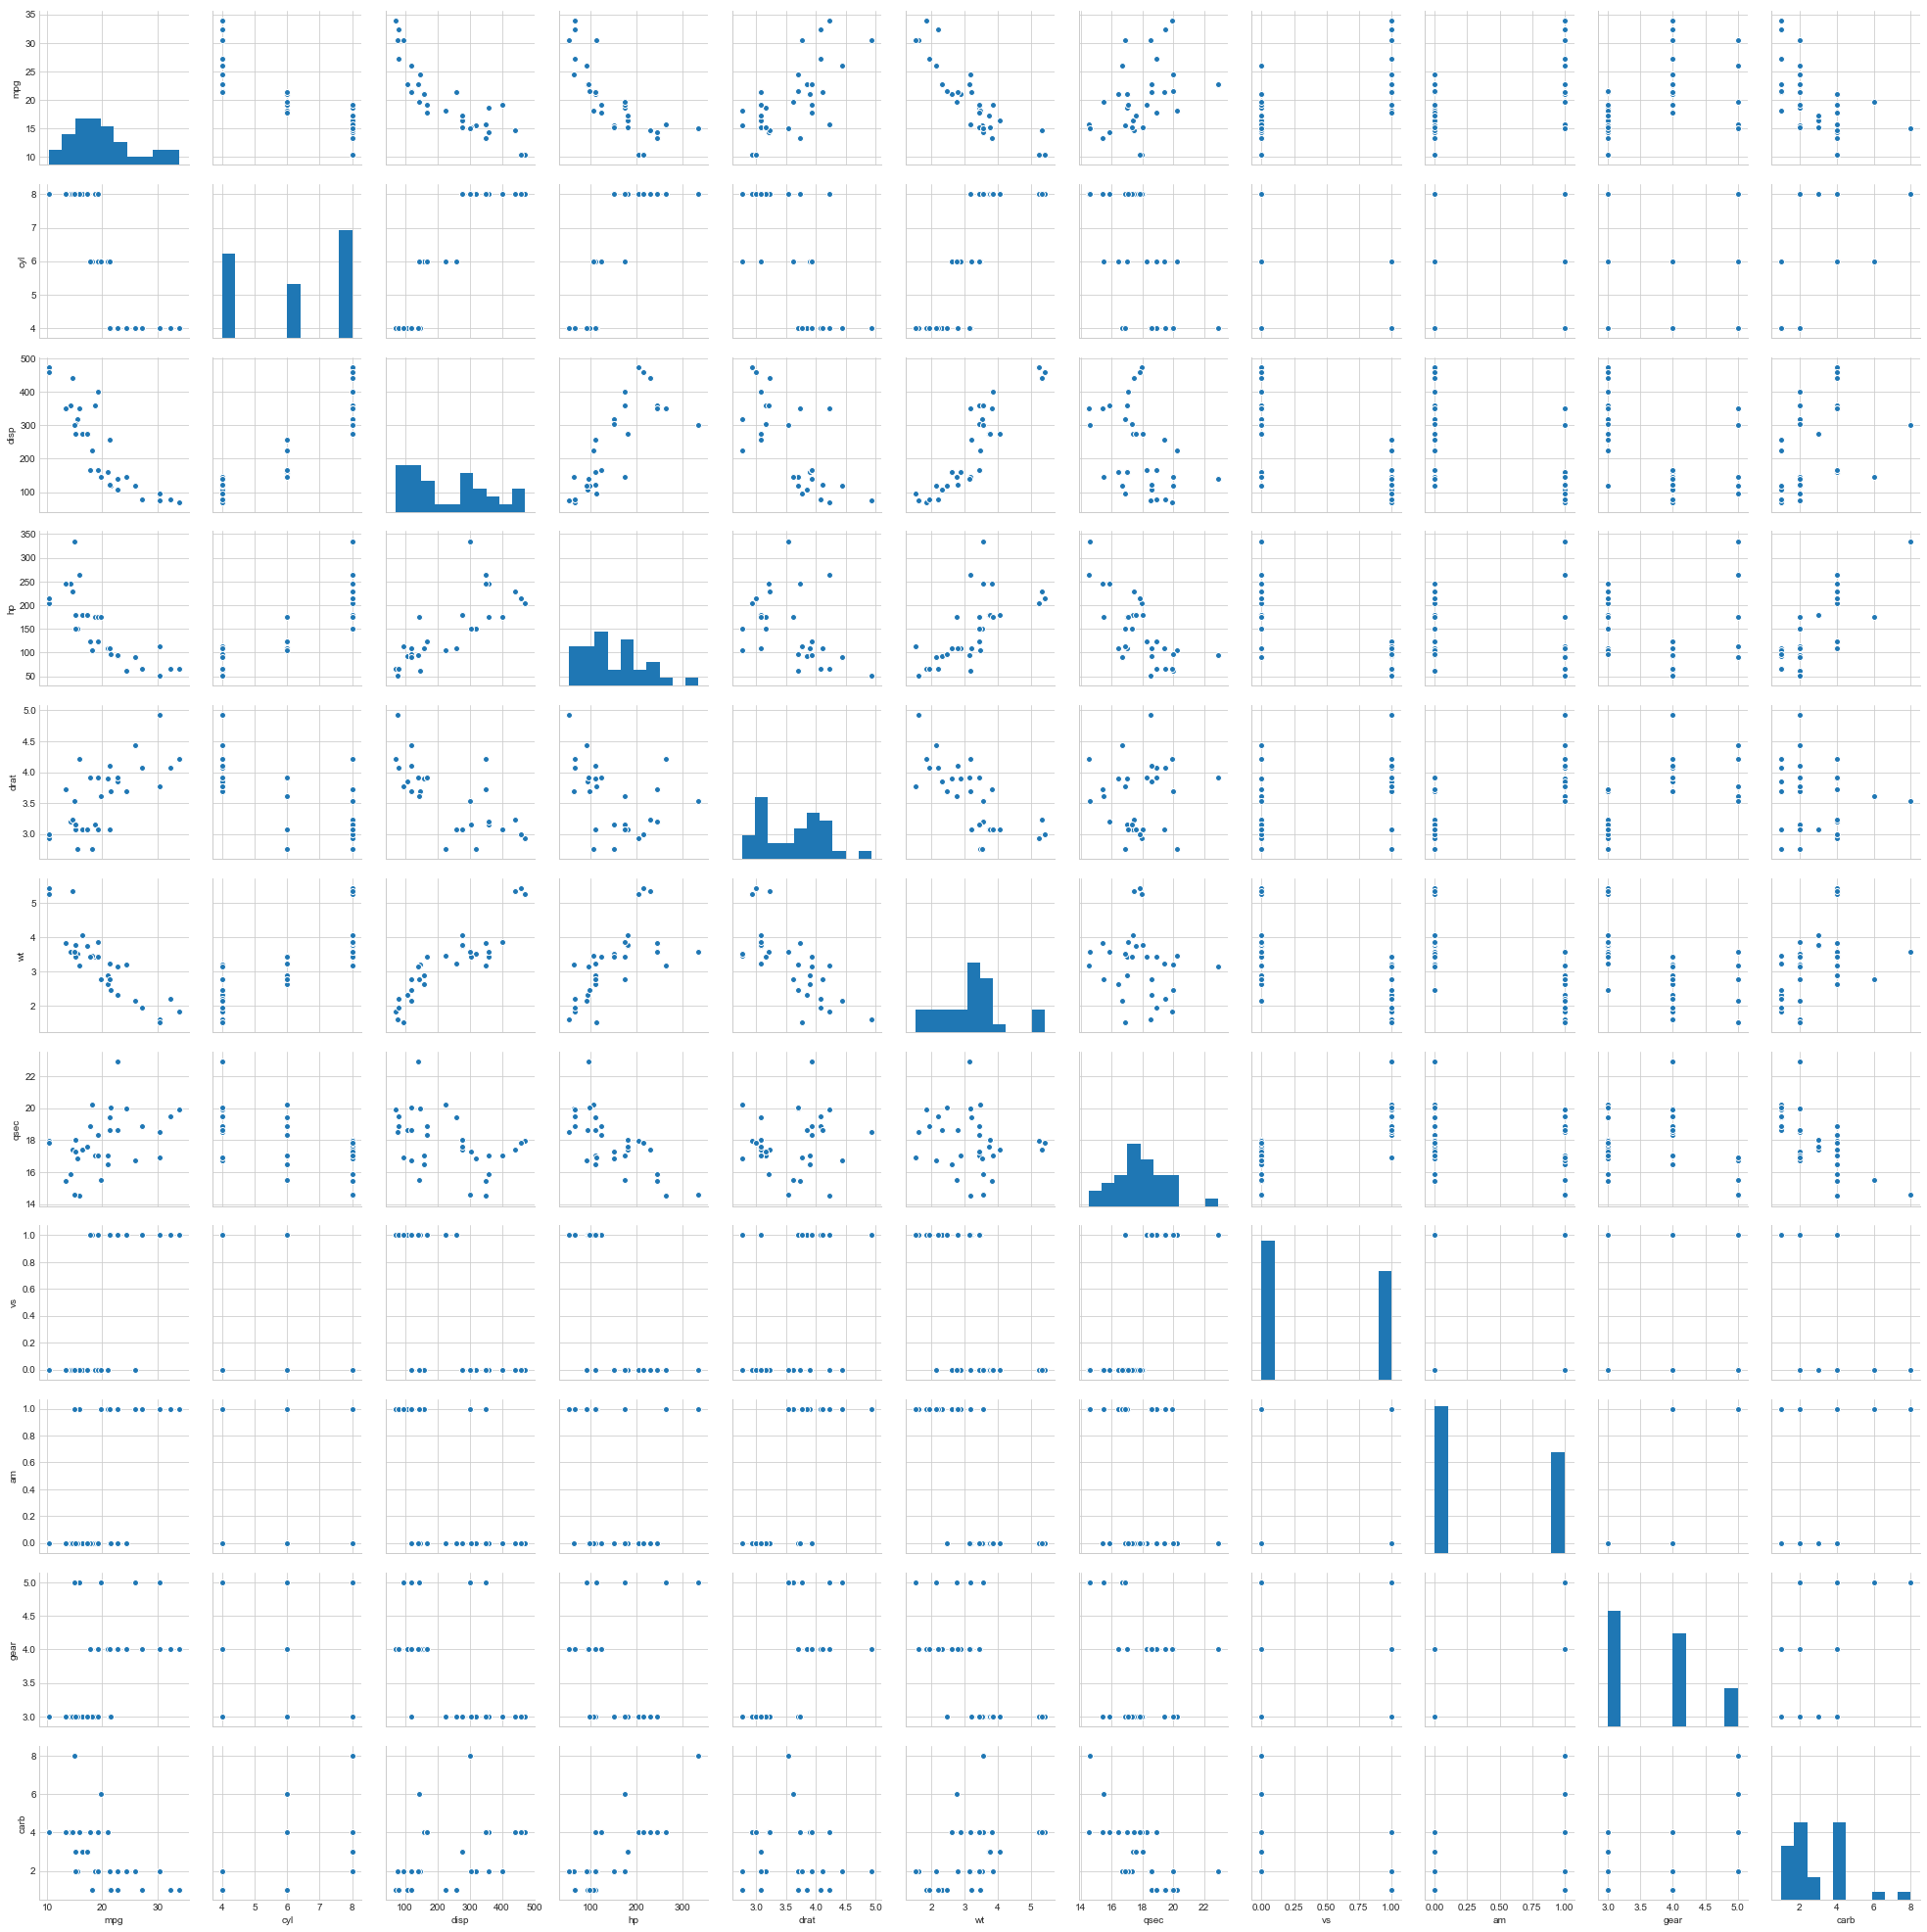

In [88]:
sb.pairplot(cars)

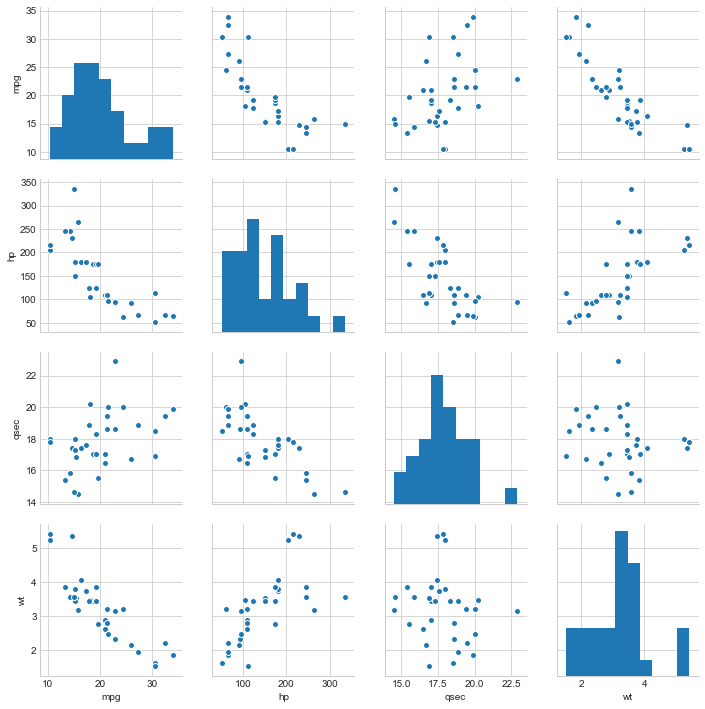

In [74]:
x=cars[['mpg','hp','qsec','wt']]
sb.pairplot(x)

## using scipy to calculate the pearson correlation coeffcient

In [76]:
mpg=cars['mpg']
hp=cars['hp']
qsec=cars['qsec']
wt=cars['wt']
pearsonr_coefficient,p_value=pearsonr(mpg,hp)
print('pearsonR correlation coefficient %0.3f'%(pearsonr_coefficient))

pearsonR correlation coefficient -0.776


In [77]:
pearsonr_coefficient,p_value=pearsonr(mpg,qsec)
print('pearsonR correlation coefficient %0.3f'%(pearsonr_coefficient))

pearsonR correlation coefficient 0.419


In [78]:
pearsonr_coefficient,p_value=pearsonr(mpg,wt)
print('pearsonR correlation coefficient %0.3f'%(pearsonr_coefficient))

pearsonR correlation coefficient -0.868


## using pandas to calculte the pearson correlation coefficient

In [79]:
corr=x.corr()
corr

,mpg,hp,qsec,wt
mpg,1.000000,-0.776168,0.418684,-0.867659
hp,-0.776168,1.000000,-0.708223,0.658748
qsec,0.418684,-0.708223,1.000000,-0.174716
wt,-0.867659,0.658748,-0.174716,1.000000


# using seaborn to visualize the pearson correlation coefficient

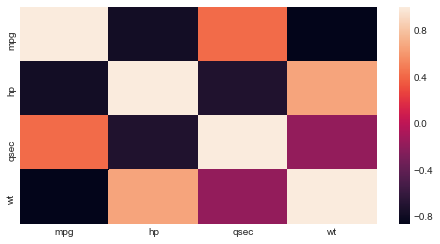

In [81]:
sb.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

# segment 5 - delving into non-parametric method using pandas and scipy

In [102]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats import spearmanr

In [103]:
%matplotlib inline
rcParams['figure.figsize']=14,7
plt.style.use('seaborn-whitegrid')

# the Spearman rank correlation

In [104]:
cars=pd.read_csv('mtcars.csv')
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


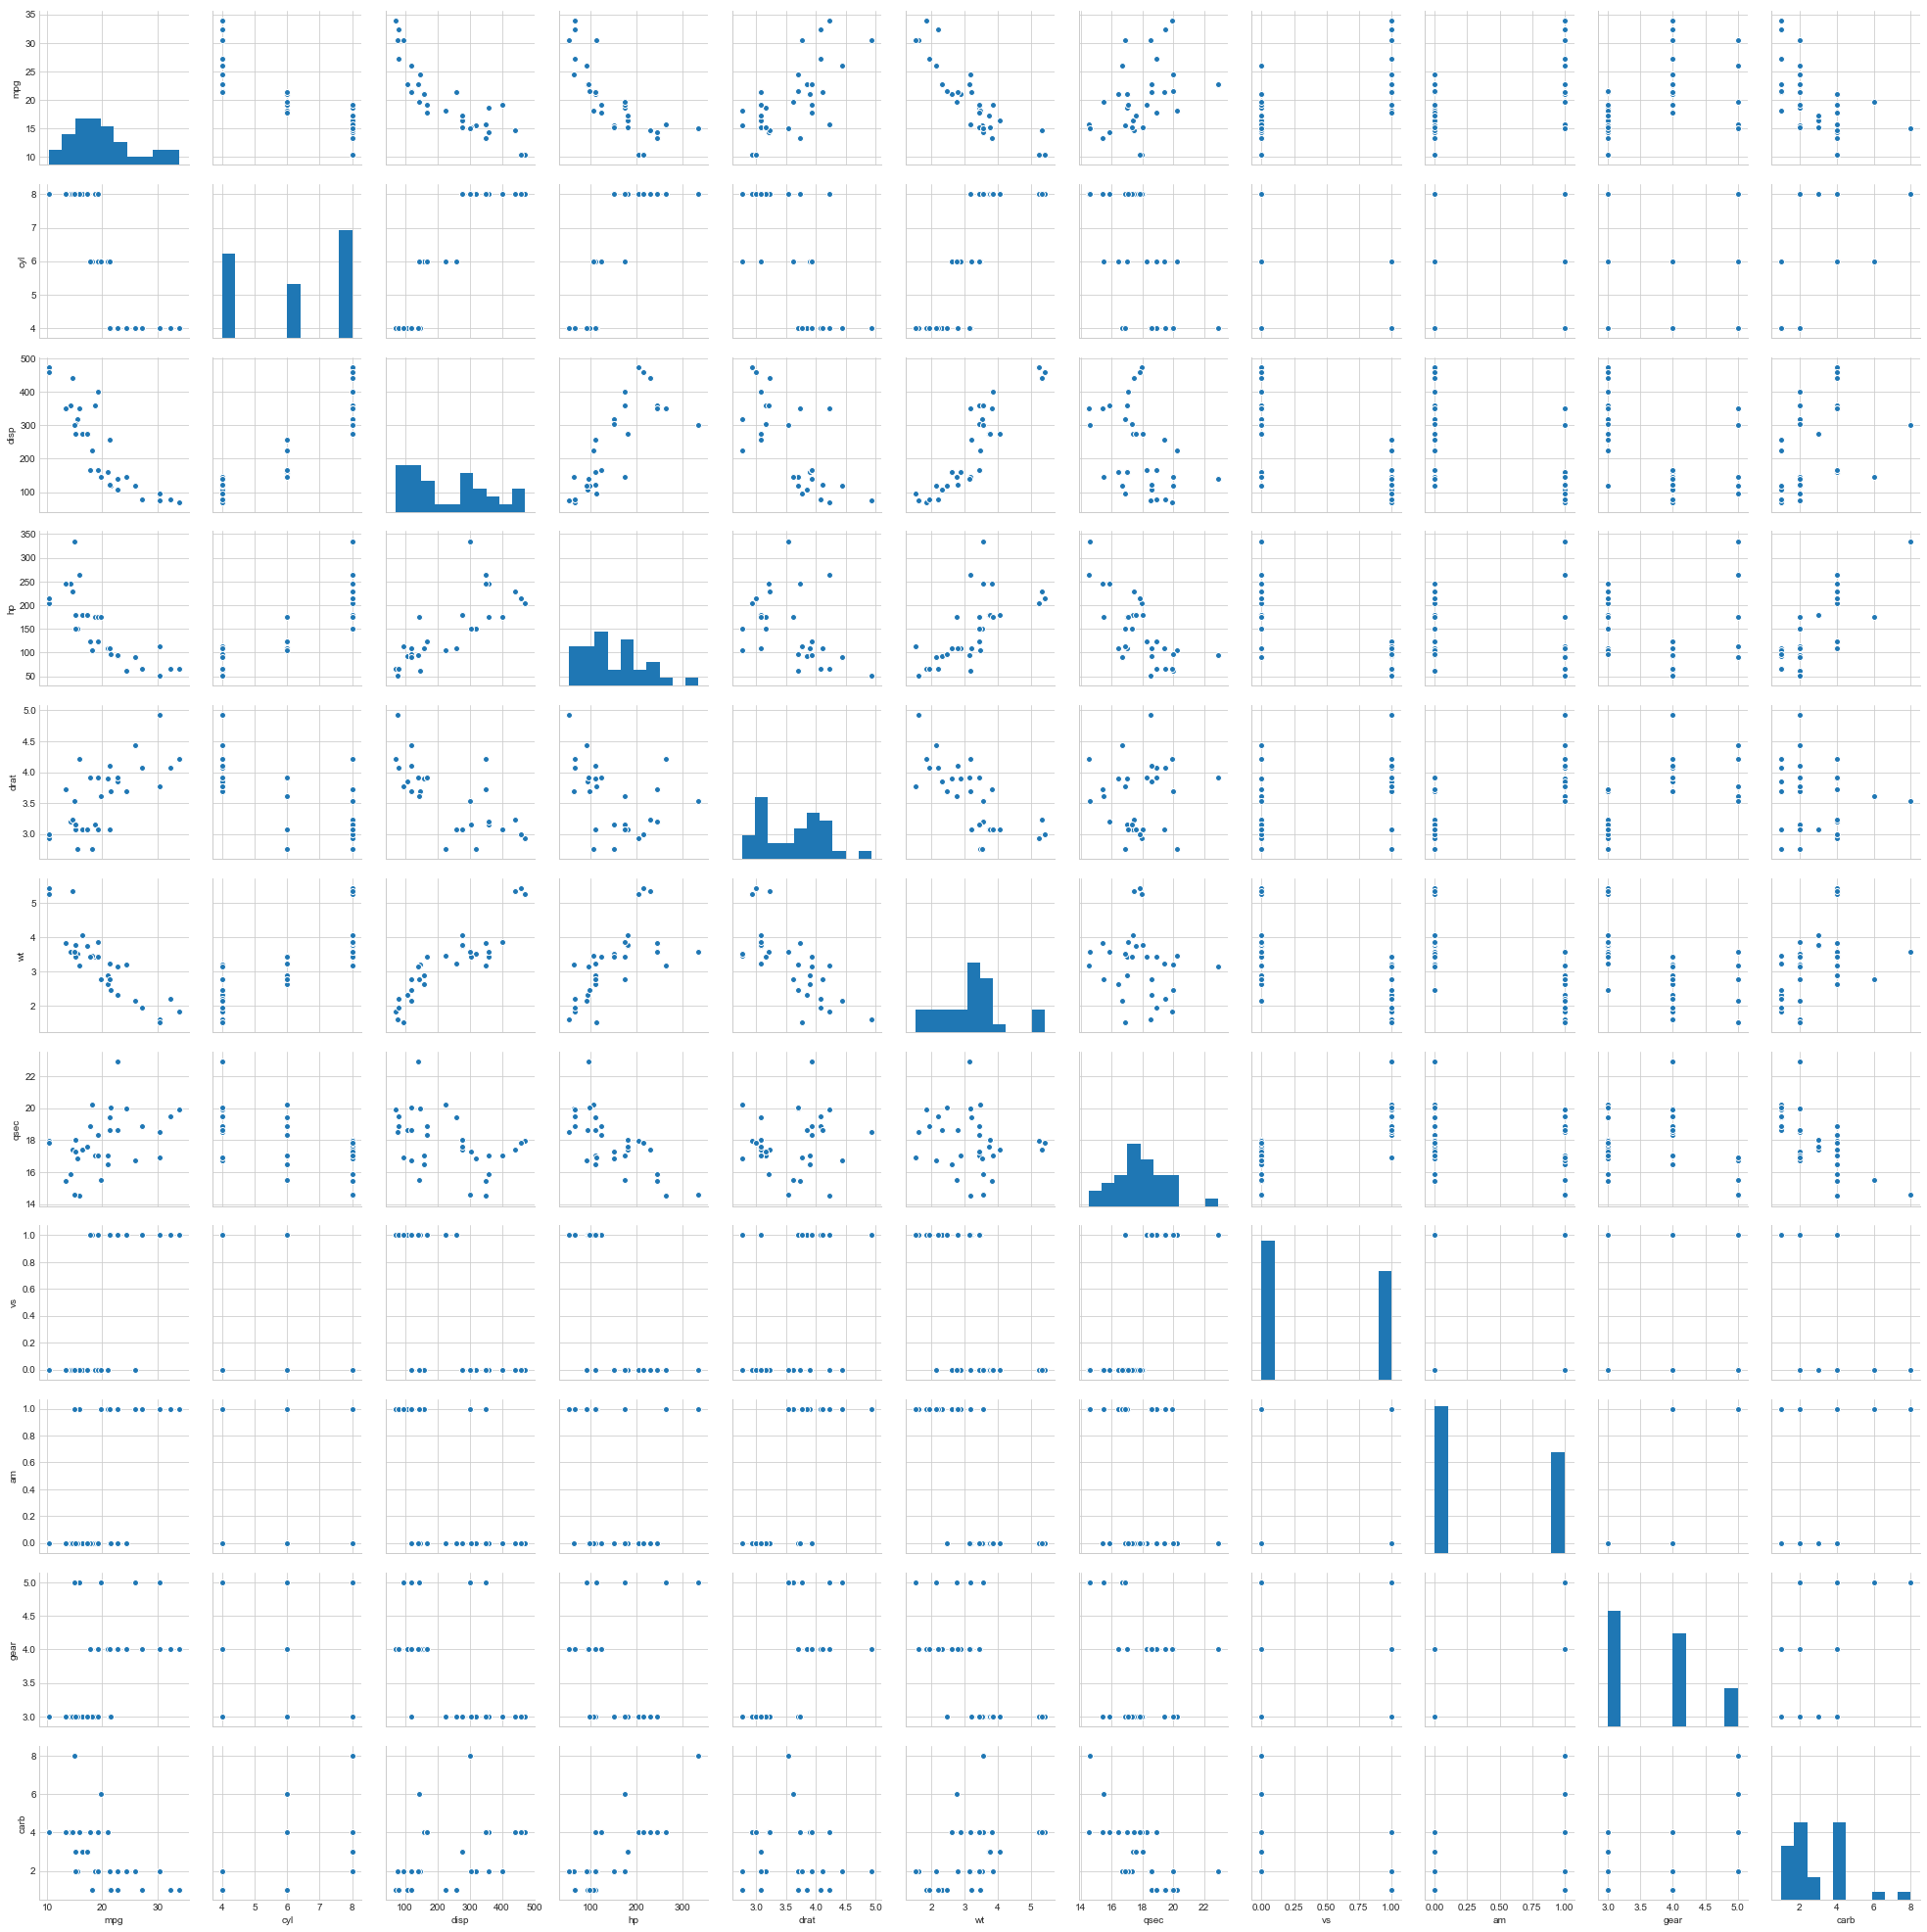

In [105]:
sb.pairplot(cars)

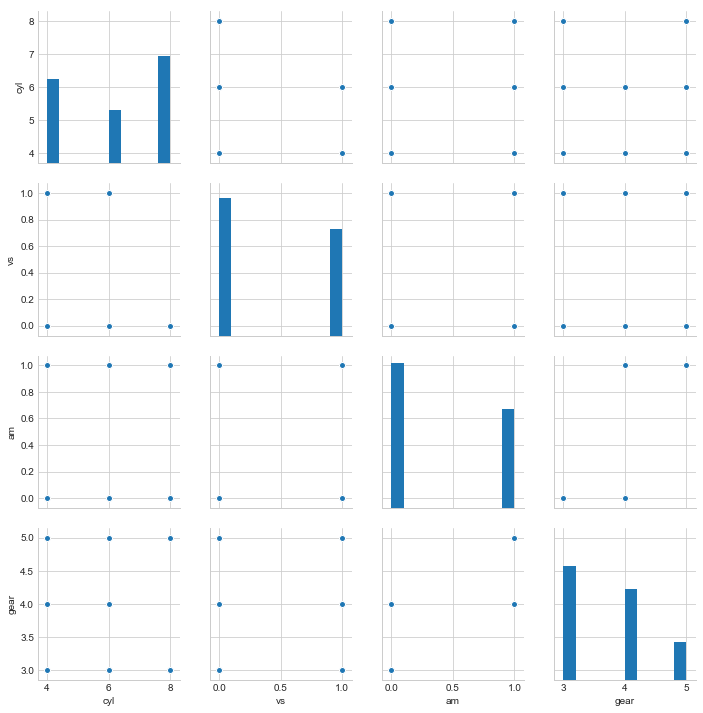

In [106]:
x=cars[['cyl','vs','am','gear']]
sb.pairplot(x)

In [108]:
cyl=cars['cyl']
vs=cars['vs']

am=cars['am']
gear=cars['gear']
spearmanr_coefficient,p_value=spearmanr(cyl,vs)
print('Spearman rank correlation coefficient %0.3f'%(spearmanr_coefficient))

Spearman rank correlation coefficient -0.814


In [111]:
spearmanr_coefficient,p_value=spearmanr(cyl,am)
print('Spearman rank correlation coefficient %0.3f'%(spearmanr_coefficient))


Spearman rank correlation coefficient -0.522


In [110]:
spearmanr_coefficient,p_value=spearmanr(cyl,gear)
print('Spearman rank correlation coefficient %0.3f'%(spearmanr_coefficient))

Spearman rank correlation coefficient -0.564


# chi-square test for independence

In [114]:
table=pd.crosstab(cyl,am)
from scipy.stats import chi2_contingency
chi2,p,dof,expected=chi2_contingency(table.values)
print('chi-square statistic %0.3f p_value %0.3f'%(chi2,p))

chi-square statistic 8.741 p_value 0.013


In [115]:
table=pd.crosstab(cars['cyl'],cars['gear'])
chi2,p,dof,expected=chi2_contingency(table.values)
print('chi-square statistic %0.3f p_value %0.3f'%(chi2,p))

chi-square statistic 18.036 p_value 0.001


In [116]:
table=pd.crosstab(cars['cyl'],cars['vs'])
chi2,p,dof,expected=chi2_contingency(table.values)
print('chi-square statistic %0.3f p_value %0.3f'%(chi2,p))

chi-square statistic 21.340 p_value 0.000


# segment 6- transforming dataset distributions

In [125]:
import numpy as np
import pandas as pd
from pandas import Series
import scipy
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [126]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

## Normalizing and transforming features with MinMaxScalar() and fit_transform()

In [127]:
cars=pd.read_csv('mtcars.csv')
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']


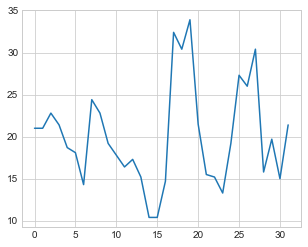

In [128]:
mpg=cars.mpg
plt.plot(mpg)

In [129]:
cars[['mpg']].describe()

,mpg
count,32.000000
mean,20.090625
std,6.026948
min,10.400000
25%,15.425000
50%,19.200000
75%,22.800000
max,33.900000


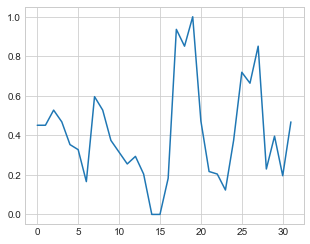

In [132]:
mpg_matrix=mpg.values.reshape(-1,1)
scaled=preprocessing.MinMaxScaler()
scaled_mpg=scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

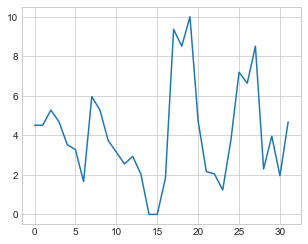

In [133]:
mpg_matrix=mpg.values.reshape(-1,1)
scaled=preprocessing.MinMaxScaler(feature_range=(
0,10))
scaled_mpg=scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

## using scale() to scale your fearture

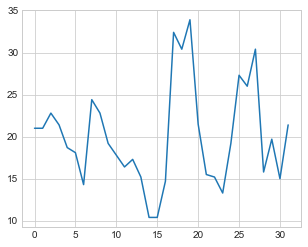

In [134]:
standardized_mpg=scale(mpg,axis=0,with_mean=False,with_std=False)
plt.plot(standardized_mpg)

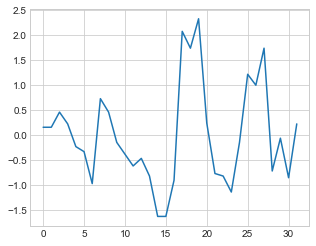

In [135]:
atandardized_mpg=scale(mpg)
plt.plot(atandardized_mpg)

# chapter 4- Dimensioality Reduction

# segment 1-  intoduction to ML

# segment 2-Explanatory factor analysis

In [136]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import FactorAnalysis
from sklearn import datasets

## Factor analysis on iris dataset

In [138]:
iris=datasets.load_iris()
x=iris.data
variable_names=iris.feature_names
x[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [139]:
factor=FactorAnalysis().fit(x)

pd.DataFrame(factor.components_,columns=variable_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.707227,-0.153147,1.653151,0.701569
1,0.114676,0.159763,-0.045604,-0.014052
2,-0.000000,0.000000,0.000000,0.000000
3,-0.000000,0.000000,0.000000,-0.000000


## segment 3- principal component analysis

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML
from pylab import rcParams
import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets

In [145]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

## PCA on the iris dataset

In [146]:
iris=datasets.load_iris()
x=iris.data
variable_names=iris.feature_names
x[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [147]:
pca=decomposition.PCA()
iris_pca=pca.fit_transform(x)

pca.explained_variance_ratio_

array([0.92, 0.05, 0.02, 0.01])

In [148]:
pca.explained_variance_ratio_.sum()

1.0

In [149]:
comp=pd.DataFrame(pca.components_,columns=variable_names)
comp

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361590,-0.082269,0.856572,0.358844
1,0.656540,0.729712,-0.175767,-0.074706
2,-0.580997,0.596418,0.072524,0.549061
3,0.317255,-0.324094,-0.479719,0.751121


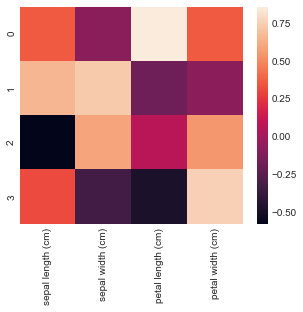

In [150]:
sb.heatmap(comp)

# chapter 5-Outlier analysis

## Segment 1-Extreme value analysis using univariate methods

In [152]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

In [153]:
%matplotlib inline
rcParams['figure.figsize']=5,4

In [164]:
df=pd.read_csv('iris.data.csv',header=None,sep=',')
df.columns=['sepal length','sepal width','petal length','petal width','species']
x=df.ix[:,0:4].values
y=df.ix[:,4].values
df[:5]

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## identifying outliers from tukey boxplot

[]

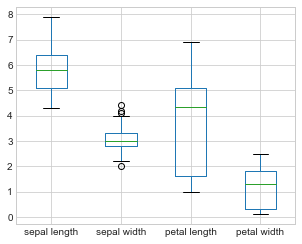

In [155]:
df.boxplot(return_type='dict')
plt.plot()

In [156]:
sepal_width=x[:,1]
iris_outliers=(sepal_width > 4)
df[iris_outliers]

,sepal length,sepal width,petal length,petal width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


In [157]:
sepal_width=x[:,1]
iris_outliers=(sepal_width < 2.05)
df[iris_outliers]

,sepal length,sepal width,petal length,petal width,species
60,5.0,2.0,3.5,1.0,versicolor


## applying tukey outlier labeling

In [160]:
pd.options.display.float_format='{:.1f}'.format
x_df=pd.DataFrame(x)
print(x_df.describe())

          0     1     2     3
count 150.0 150.0 150.0 150.0
mean    5.8   3.1   3.8   1.2
std     0.8   0.4   1.8   0.8
min     4.3   2.0   1.0   0.1
25%     5.1   2.8   1.6   0.3
50%     5.8   3.0   4.3   1.3
75%     6.4   3.3   5.1   1.8
max     7.9   4.4   6.9   2.5


## segment 2- Multivariate analysis for outlier detection

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb


In [163]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

## Visually inspecting boxplot

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


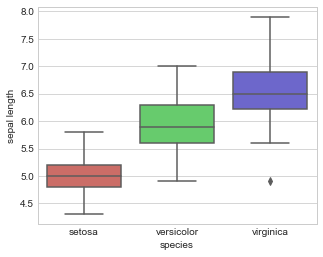

In [166]:
df=pd.read_csv('iris.data.csv',header=None,sep=',')
df.columns=['sepal length','sepal width','petal length','petal width','species']
data=df.ix[:,0:4].values
target=df.ix[:,4].values
df[:5]

sb.boxplot(x='species',y='sepal length',data=df,palette='hls')

## looking at the scatterplot matrix

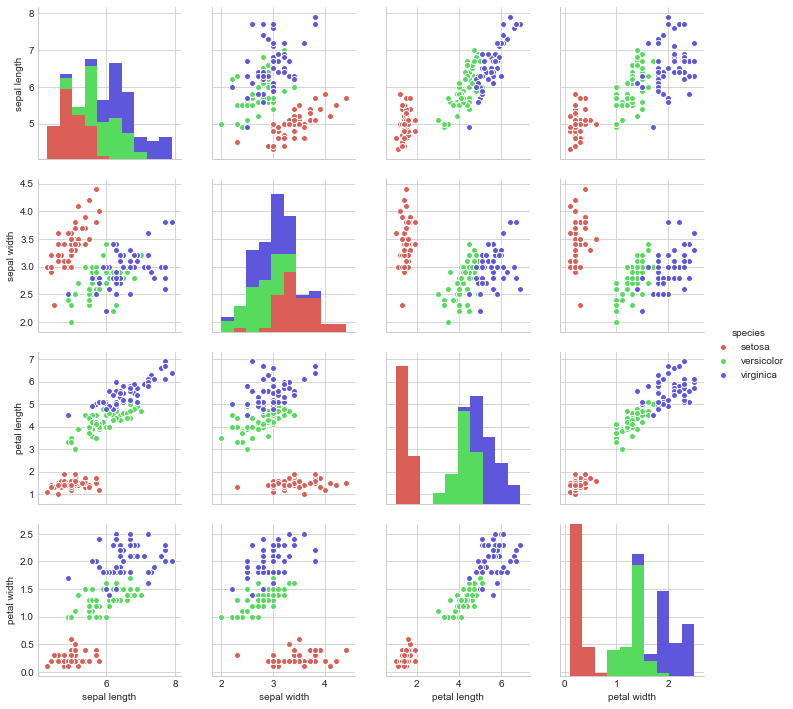

In [167]:
sb.pairplot(df,hue='species',palette='hls')


## segment 3-DBSCan clusterinig to identify outliers

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [170]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

## DBSCan clustering to identify outliers

## trian your model and identify outliers

In [171]:
df=pd.read_csv('iris.data.csv',header=None,sep=',')
df.columns=['sepal length','sepal width','petal length','petal width','species']
data=df.ix[:,0:4].values
target=df.ix[:,4].values
df[:5]

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [173]:
model=DBSCAN(eps=0.8,min_samples=19).fit(data)
print(model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=1, p=None)


## Visualize your result

In [174]:
outliers_df=pd.DataFrame(data)

print(Counter(model.labels_))
print(outliers_df[model.labels_==-1])

Counter({1: 94, 0: 50, -1: 6})
      0   1   2   3
98  5.1 2.5 3.0 1.1
105 7.6 3.0 6.6 2.1
117 7.7 3.8 6.7 2.2
118 7.7 2.6 6.9 2.3
122 7.7 2.8 6.7 2.0
131 7.9 3.8 6.4 2.0


Text(0.5,1,'DBScan for outlier detection')

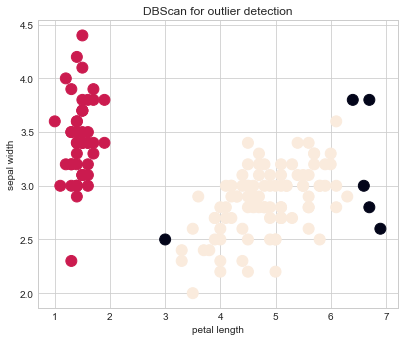

In [176]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,1,1])

colors=model.labels_
ax.scatter(data[:,2],data[:,1],c=colors,s=120)
ax.set_xlabel('petal length')
ax.set_ylabel('sepal width')
plt.title('DBScan for outlier detection')

# chapter 6 - cluster analysis

## segment 1- K-mean method

## setting up for clustering analysis

In [182]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn  import datasets
from sklearn.metrics import confusion_matrix,classification_report

In [183]:
%matplotlib inline
plt.figure(figsize=(7,4))


<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [184]:
iris=datasets.load_iris()
x=scale(iris.data)
y=pd.DataFrame(iris.target)
variable_names=iris.feature_names
x[0:10,]


array([[-0.9 ,  1.03, -1.34, -1.31],
       [-1.14, -0.12, -1.34, -1.31],
       [-1.39,  0.34, -1.4 , -1.31],
       [-1.51,  0.11, -1.28, -1.31],
       [-1.02,  1.26, -1.34, -1.31],
       [-0.54,  1.96, -1.17, -1.05],
       [-1.51,  0.8 , -1.34, -1.18],
       [-1.02,  0.8 , -1.28, -1.31],
       [-1.75, -0.36, -1.34, -1.31],
       [-1.14,  0.11, -1.28, -1.44]])

## building and running your model

In [192]:
clustering=KMeans(n_clusters=3,random_state=5)
clustering.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

## plotting your model outputs

In [193]:
iris_df=pd.DataFrame(iris.data)
iris_df.columns=['sepal_length','sepal_width','petal_length','petal_width']
y.columns=['targeta']

Text(0.5,1,'k-means classification')

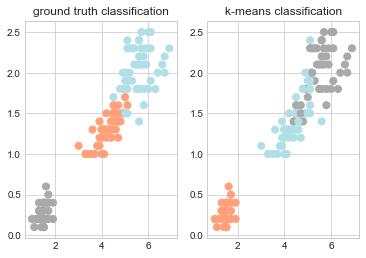

In [194]:
color_theme=np.array(['darkgray','lightsalmon','powderblue'])
plt.subplot(1,2,1)
plt.scatter(x=iris_df.petal_length,y=iris_df.petal_width,c=color_theme[iris.target],s=50)
plt.title('ground truth classification')
plt.subplot(1,2,2)
plt.scatter(x=iris_df.petal_length,y=iris_df.petal_width,c=color_theme[clustering.labels_],s=50)
plt.title('k-means classification')

Text(0.5,1,'k-means classification')

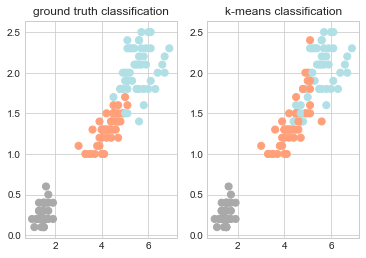

In [197]:
relabel=np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=iris_df.petal_length,y=iris_df.petal_width,c=color_theme[iris.target],s=50)
plt.title('ground truth classification')
plt.subplot(1,2,2)
plt.scatter(x=iris_df.petal_length,y=iris_df.petal_width,c=color_theme[relabel],s=50)
plt.title('k-means classification')

## evalute your cluster model

In [199]:
print(classification_report(y, relabel))


# k-mean clustering example
#precision: a measure of the model's relavency
# recall:a measure of the model's completness
## high precision+high recall==highly accurate model results


             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.74      0.78      0.76        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150



## segment 2- hierarchial methods
### setting for clustering analysis

In [202]:
import numpy as np
import pandas as pd
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [203]:
np.set_printoptions(precision=4,suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')


In [205]:
cars=pd.read_csv('mtcars.csv')
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
x=cars.ix[:,(1,3,4,6)].values

y=cars.ix[:,(9)].values

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


## using scipy to generate dendrograms

In [206]:
z=linkage(x,'ward')

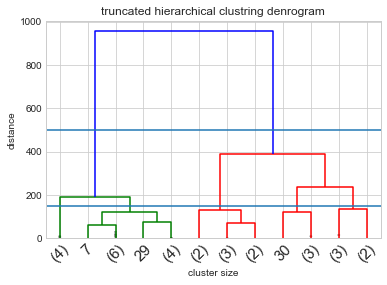

In [208]:
dendrogram(z,truncate_mode='lastp',p=12,leaf_rotation=45.,leaf_font_size=15,show_contracted=True)
plt.title('truncated hierarchical clustring denrogram')
plt.xlabel('cluster size')
plt.ylabel('distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

## generating hierarchical cluster

In [211]:
k=2
Hclustering=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
Hclustering.fit(x)
sm.accuracy_score(y,Hclustering.labels_)

0.78125

In [212]:
Hclustering=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='complete')
Hclustering.fit(x)
sm.accuracy_score(y,Hclustering.labels_)

0.4375

In [213]:
Hclustering=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='average')
Hclustering.fit(x)
sm.accuracy_score(y,Hclustering.labels_)

0.78125

In [214]:

Hclustering=AgglomerativeClustering(n_clusters=k,affinity='manhattan',linkage='average')
Hclustering.fit(x)
sm.accuracy_score(y,Hclustering.labels_)

0.71875

## segment 3-instance-based learning q/k-nearest neighbor
### setting up for classification analysis

In [216]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
from pylab import rcParams
import urllib
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [218]:
np.set_printoptions(precision=4,suppress=True)
%matplotlib inline
rcParams['figure.figsize']=7,4
plt.style.use('seaborn-whitegrid')

## splitting your data into test and training dataset

In [219]:
cars=pd.read_csv('mtcars.csv')
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
x_prime=cars.ix[:,(1,3,4,6)].values
y=cars.ix[:,9].values



C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [220]:
x=preprocessing.scale(x_prime)

In [225]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.33,random_state=17)


## Building and training your model with training data

In [226]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)
print(clf)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


## evaluating your model's prediction against the test dataset

In [227]:
y_expect=y_test
y_pred=clf.predict(x_test)
print(metrics.classification_report(y_expect,y_pred))

             precision    recall  f1-score   support

          0       0.71      1.00      0.83         5
          1       1.00      0.67      0.80         6

avg / total       0.87      0.82      0.82        11



# chapter 7- network analysis

## segment 1- inroduction to network analysis

## segment 2-working with graph objects

In [228]:
!pip install networkx

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import networkx as nx

In [230]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

## Creating graph object

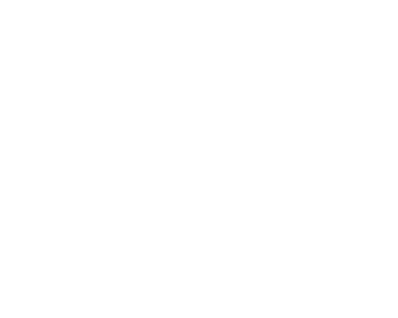

In [231]:
g=nx.Graph()
nx.draw(g)

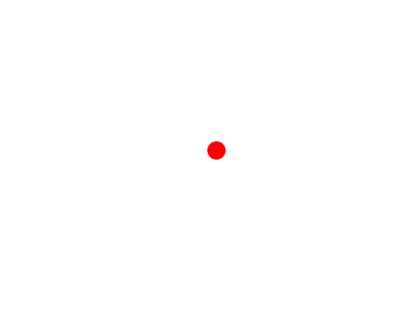

In [233]:
g.add_node(1)
nx.draw(g)

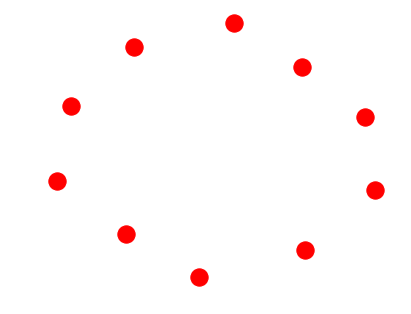

In [235]:
g.add_nodes_from([2,3,4,5,6,8,9,11,12])
nx.draw(g)

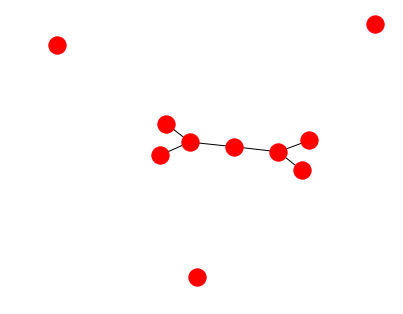

In [236]:
g.add_edges_from([(2,4),(2,6),(2,12),(3,6),(3,9),(5,3)])
nx.draw(g)

## the basics about drawing graph objects

## chapter 9- web-based data visualizations with plotly

## segment 1- creating basic chart

In [2]:
! pip install Plotly

In [3]:
! pip install cufflinks

  Running setup.py bdist_wheel for cufflinks: started
  Running setup.py bdist_wheel for cufflinks: finished with status 'done'
  Stored in directory: C:\Users\DELL\AppData\Local\pip\Cache\wheels\ef\6a\a4\ff5ceff51314afb5bb24745bf74b51ed4cee53609b66bafa1c
  Running setup.py bdist_wheel for colorlover: started
  Running setup.py bdist_wheel for colorlover: finished with status 'done'
  Stored in directory: C:\Users\DELL\AppData\Local\pip\Cache\wheels\fc\c3\f7\fde32e0d906ad64fe8011a823ea39e0197616116150f4a8376
Successfully built cufflinks colorlover


In [3]:
import numpy as np
import pandas as pd

import cufflinks as cf
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go

In [4]:
tls.set_credentials_file(username='ankit_123',api_key='ltq42782b8Xyzgftq5ru')

##  creating line charts

## a very basic line chart

In [5]:
a=np.linspace(start=0,stop=36,num=36)

np.random.seed(25)
b=np.random.uniform(low=0.0,high=1.0,size=36)

trace=go.Scatter(x=a,y=b)
data=[trace]
py.iplot(data,filename='basic-line-chart')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ankit_123/0 or inside your plot.ly account where it is named 'basic-line-chart'


## aline chrt with more then one variable

In [6]:
x=[1,2,3,4,5,6,7,8,9]
y=[1,2,3,4,0,4,3,2,1]
z=[10,9,8,7,6,5,4,3,2,1]
trace0=go.Scatter(x=x,y=y,name='list object',line=dict(width=5))
trace1=go.Scatter(x=x,y=z,name='list object 2',line=dict(width=10,))
data=[trace0,trace1]
layout=dict(title='double line chart',xaxis=dict(title='x-axis'),yaxis=dict(title='y-axis'))
print(layout)

{'title': 'double line chart', 'xaxis': {'title': 'x-axis'}, 'yaxis': {'title': 'y-axis'}}


In [7]:
fig=dict(data=data,layout=layout)
print(fig)

{'data': [Scatter({
    'line': {'width': 5}, 'name': 'list object', 'x': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'y': [1, 2, 3, 4, 0, 4, 3, 2, 1]
}), Scatter({
    'line': {'width': 10}, 'name': 'list object 2', 'x': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'y': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
})], 'layout': {'title': 'double line chart', 'xaxis': {'title': 'x-axis'}, 'yaxis': {'title': 'y-axis'}}}


In [8]:
py.iplot(fig,filename='styled-line-chart')

## a line chart from a pandas dataframe

In [9]:
cars=pd.read_csv('mtcars.csv')
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
df=cars[['cyl','wt','mpg']]
layout=dict(title='chart from pandas dataframe',xaxis=dict(title='x-axis'),yaxis=dict(title='y-axis'))
df.iplot(filename='cf-simple-line-chart',layout=layout)

## creating bar charts

In [10]:
data=[go.Bar(x=[1,2,3,4,5,6,7,8,9,10],y=[1,2,3,4,0,0.5,4,3,2,1])]
print(data)

[Bar({
    'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'y': [1, 2, 3, 4, 0, 0.5, 4, 3, 2, 1]
})]


In [11]:
layout=dict(title='Simple bar chart',xaxis=dict(title='x-axis'),yaxis=dict(title='y-axis'))
py.iplot(data,filename='basic-bar-chart',layout=layout)

In [12]:
color_theme=dict(color=['rgba(169,169,169,1)','rgba(255,160,122,1)','rgba(176,244,230,1)','rgba(189,183,107,1)','rgba(188,143,143,1)','rgba(221,160,221,1)','rgba(169,169,169,1)'])
print(color_theme)

{'color': ['rgba(169,169,169,1)', 'rgba(255,160,122,1)', 'rgba(176,244,230,1)', 'rgba(189,183,107,1)', 'rgba(188,143,143,1)', 'rgba(221,160,221,1)', 'rgba(169,169,169,1)']}


In [14]:
tarce0=go.Bar(x=[1,2,3,4,5,6,7],y=[1,2,3,4,0.5,3,1],marker=color_theme)
data=[tarce0]
layout=go.Layout(title='custom colors')
fig=go.Figure(data=data,layout=layout)
py.iplot(fig,filename='color-bar-chart')

## creating pie charts

In [13]:
fig={'data':[{'labels':['bicycle','motorbike','car','van','stroller'],'values':[1,2,3,4,0.5],'type':'pie'}],
    'layout':{'title':'simple pie graph '}}
py.iplot(fig)

## segment 2-creating statistical chart

In [15]:
import numpy as np
import pandas as pd
import cufflinks as cf
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import sklearn 
from sklearn.preprocessing import StandardScaler


In [16]:
tls.set_credentials_file(username='ankit_123',api_key='ltq42782b8Xyzgftq5ru')


## create histograms

### make a histogram from a pandas sereies object

In [17]:
cars=pd.read_csv('mtcars.csv')
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
mpg=cars.mpg
mpg.iplot(kind='histogram',filename='simple-histogram-chart')

In [18]:
cars_data=cars.ix[:,(1,3,4)].values
cars_data_std=StandardScaler().fit_transform(cars_data)

cars_select=pd.DataFrame(cars_data_std)
cars_select.columns=['mpg','disp','hp']

cars_select.iplot(kind='histogram',filename='multiplr-histogram-chart')

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [19]:
cars_select.iplot(kind='histogram',subplots=True,filename='multipl1-histogram-chart')

In [20]:
cars_select.iplot(kind='histogram',subplots=True,shape=(3,1),filename='mult2-histogram-chart')
# hear shape(3,1) tells the graph to be print in three row and one columns

In [21]:
cars_select.iplot(kind='histogram',subplots=True,shape=(1,3),filename='mult3-histogram-chart')

In [22]:
cars_select.iplot(kind='box',filename='boxplot')

## segment 3- creating plotly choropleth maps
#### choropleth maps
##### geographical maps where spatial areas colored in hues that represent the quantity of a given atttribute in that specific geographical region

In [23]:
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.tools as tls


In [24]:
tls.set_credentials_file(username='ankit_123',api_key='ltq42782b8Xyzgftq5ru')

## generating Choropleth maps

In [25]:
states=pd.read_csv('states.csv')
states.columns=['code','region','pop','satv','satm','persent','dollars','pay']
states.head()

,code,region,pop,satv,satm,persent,dollars,pay
0,AL,ESC,4041,470,514,8,3.648,27
1,AK,PAC,550,438,476,42,7.887,43
2,AZ,MTN,3665,445,497,25,4.231,30
3,AR,WSC,2351,470,511,6,3.334,23
4,CA,PAC,29760,419,484,45,4.826,39


In [52]:
states['text']='satv'+states['satv'].astype(str)+'satm'+states['satm'].astype(str)+'<br>'+\
'code'+states['code'].astype(str)

data=[dict(type='Choropleth',autocolorscale=False,locations=states['code'],z=states['dollars'].astype(float),locationmode='USA-states',
          text=states['text'],
          marker=dict(line=dict(
          color='rgb(255,255,255)',width=2)),)]
data


[{'type': 'Choropleth', 'autocolorscale': False, 'locations': 0     AL
  1     AK
  2     AZ
  3     AR
  4     CA
  5     CO
  6     CN
  7     DE
  8     DC
  9     FL
  10    GA
  11    HI
  12    ID
  13    IL
  14    IN
  15    IA
  16    KS
  17    KY
  18    LA
  19    ME
  20    MD
  21    MA
  22    MI
  23    MN
  24    MS
  25    MO
  26    MT
  27    NE
  28    NV
  29    NH
  30    NJ
  31    NM
  32    NY
  33    NC
  34    ND
  35    OH
  36    OK
  37    OR
  38    PA
  39    RI
  40    SC
  41    SD
  42    TN
  43    TX
  44    UT
  45    VT
  46    VA
  47    WA
  48    WV
  49    WI
  50    WY
  Name: code, dtype: object, 'z': 0     3.648
  1     7.887
  2     4.231
  3     3.334
  4     4.826
  5     4.809
  6     7.914
  7     6.016
  8     8.210
  9     5.154
  10    4.860
  11    5.008
  12    3.200
  13    5.062
  14    5.051
  15    4.839
  16    5.009
  17    4.390
  18    4.012
  19    5.894
  20    6.184
  21    6.351
  22    5.257
  23    5.260
  24    3.3

In [53]:
layout=dict(title='State Spending on Public Education, in $k/student',
            geo=dict(scope='usa',projection=dict(type='albers usa'),showlakes=True,lakecolor='rgb(66,165,245)'),)
layout

{'title': 'State Spending on Public Education, in $k/student',
 'geo': {'scope': 'usa',
  'projection': {'type': 'albers usa'},
  'showlakes': True,
  'lakecolor': 'rgb(66,165,245)'}}

In [54]:
fig=dict(data=data,layout=layout)
py.iplot(fig,filename='d3-choropleth-map')

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [{'type': 'Choropleth', 'autocolorscale': False, 'locations': 0     AL
1     AK
2     AZ
3     AR
4     CA
5     CO
6     CN
7     DE
8     DC
9     FL
10    GA
11    HI
12    ID
13    IL
14    IN
15    IA
16    KS
17    KY
18    LA
19    ME
20    MD
21    MA
22    MI
23    MN
24    MS
25    MO
26    MT
27    NE
28    NV
29    NH
30    NJ
31    NM
32    NY
33    NC
34    ND
35    OH
36    OK
37    OR
38    PA
39    RI
40    SC
41    SD
42    TN
43    TX
44    UT
45    VT
46    VA
47    WA
48    WV
49    WI
50    WY
Name: code, dtype: object, 'z': 0     3.648
1     7.887
2     4.231
3     3.334
4     4.826
5     4.809
6     7.914
7     6.016
8     8.210
9     5.154
10    4.860
11    5.008
12    3.200
13    5.062
14    5.051
15    4.839
16    5.009
17    4.390
18    4.012
19    5.894
20    6.184
21    6.351
22    5.257
23    5.260
24    3.322
25    4.415
26    5.184
27    4.381
28    4.564
29    5.504
30    9.159
31    4.446
32    8.500
33    4.802
34    3.685
35    5.639
36    3.742
37    5.291
38    6.534
39    6.989
40    4.327
41    3.730
42    3.707
43    4.238
44    2.993
45    5.740
46    5.360
47    5.045
48    5.046
49    5.946
50    5.255
Name: dollars, dtype: float64, 'locationmode': 'USA-states', 'text': 0     satv470satm514<br>codeAL
1     satv438satm476<br>codeAK
2     satv445satm497<br>codeAZ
3     satv470satm511<br>codeAR
4     satv419satm484<br>codeCA
5     satv456satm513<br>codeCO
6     satv430satm471<br>codeCN
7     satv433satm470<br>codeDE
8     satv409satm441<br>codeDC
9     satv418satm466<br>codeFL
10    satv401satm443<br>codeGA
11    satv404satm481<br>codeHI
12    satv466satm502<br>codeID
13    satv466satm528<br>codeIL
14    satv408satm459<br>codeIN
15    satv511satm577<br>codeIA
16    satv492satm548<br>codeKS
17    satv473satm521<br>codeKY
18    satv476satm517<br>codeLA
19    satv423satm463<br>codeME
20    satv430satm478<br>codeMD
21    satv427satm473<br>codeMA
22    satv454satm514<br>codeMI
23    satv477satm542<br>codeMN
24    satv477satm519<br>codeMS
25    satv473satm522<br>codeMO
26    satv464satm523<br>codeMT
27    satv484satm546<br>codeNE
28    satv434satm487<br>codeNV
29    satv442satm486<br>codeNH
30    satv418satm473<br>codeNJ
31    satv480satm527<br>codeNM
32    satv412satm470<br>codeNY
33    satv401satm440<br>codeNC
34    satv505satm564<br>codeND
35    satv450satm499<br>codeOH
36    satv478satm523<br>codeOK
37    satv439satm484<br>codeOR
38    satv420satm463<br>codePA
39    satv422satm461<br>codeRI
40    satv397satm437<br>codeSC
41    satv506satm555<br>codeSD
42    satv483satm525<br>codeTN
43    satv413satm461<br>codeTX
44    satv492satm539<br>codeUT
45    satv431satm466<br>codeVT
46    satv425satm470<br>codeVA
47    satv437satm486<br>codeWA
48    satv443satm490<br>codeWV
49    satv476satm543<br>codeWI
50    satv458satm519<br>codeWY
Name: text, dtype: object, 'marker': {'line': {'color': 'rgb(255,255,255)', 'width': 2}}}]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['area', 'bar', 'barpolar', 'box',
                     'candlestick', 'carpet', 'choropleth', 'cone',
                     'contour', 'contourcarpet', 'heatmap',
                     'heatmapgl', 'histogram', 'histogram2d',
                     'histogram2dcontour', 'mesh3d', 'ohlc',
                     'parcats', 'parcoords', 'pie', 'pointcloud',
                     'sankey', 'scatter', 'scatter3d',
                     'scattercarpet', 'scattergeo', 'scattergl',
                     'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scatterternary', 'splom',
                     'streamtube', 'surface', 'table', 'violin']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [51]:
import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['state'] + '<br>' +\
    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['total exports'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [55]:
! pip install Sframe

  Could not find a version that satisfies the requirement Sframe (from versions: )
No matching distribution found for Sframe
